In [25]:
import pandas as pd

In [27]:
data = pd.read_excel("AnomaData.xlsx")

In [28]:
data['time'] = pd.to_datetime(data['time'], format='%m/%d/%y %H:%M')

In [29]:
print(data.info()) 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

In [30]:
print(data.duplicated().sum()) 


0


In [31]:
print(data.isnull().sum())  

time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64


In [32]:
print(data['y'].value_counts())

y
0    18274
1      124
Name: count, dtype: int64


Analyzing Feature: x1


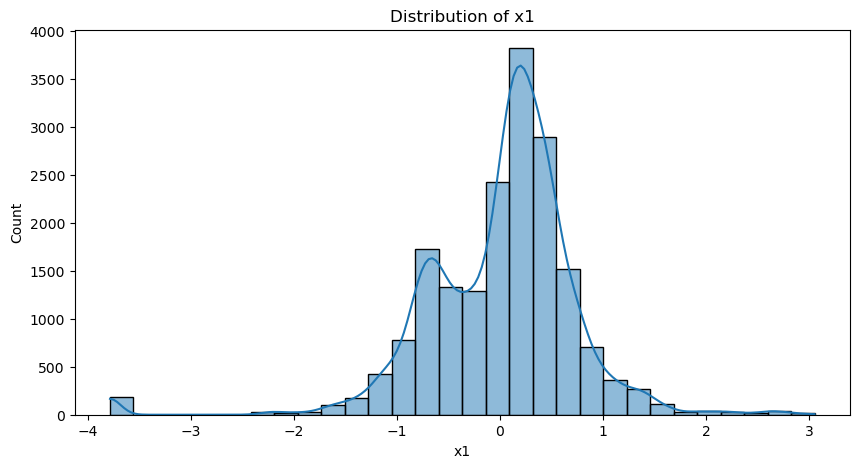

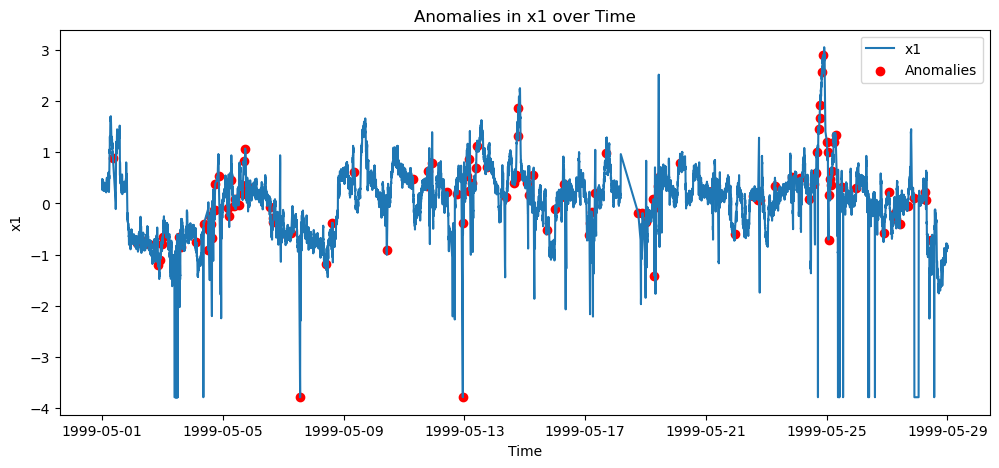

Analyzing Feature: x10


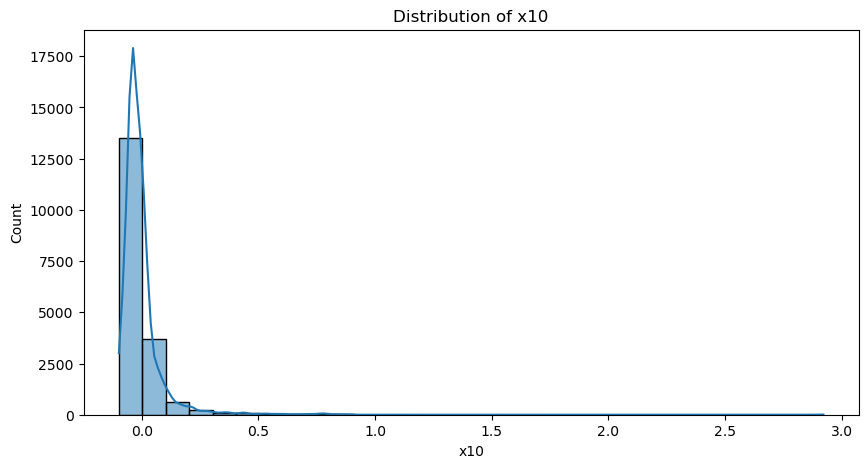

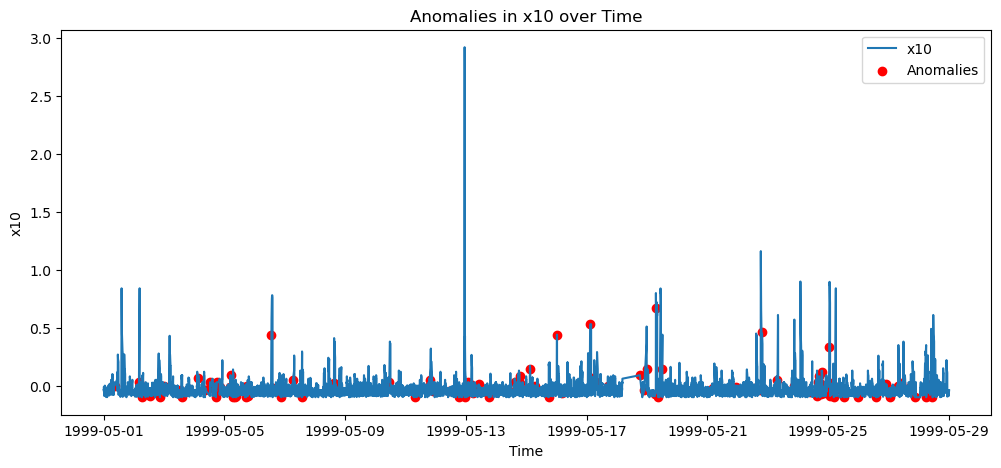

Analyzing Feature: x11


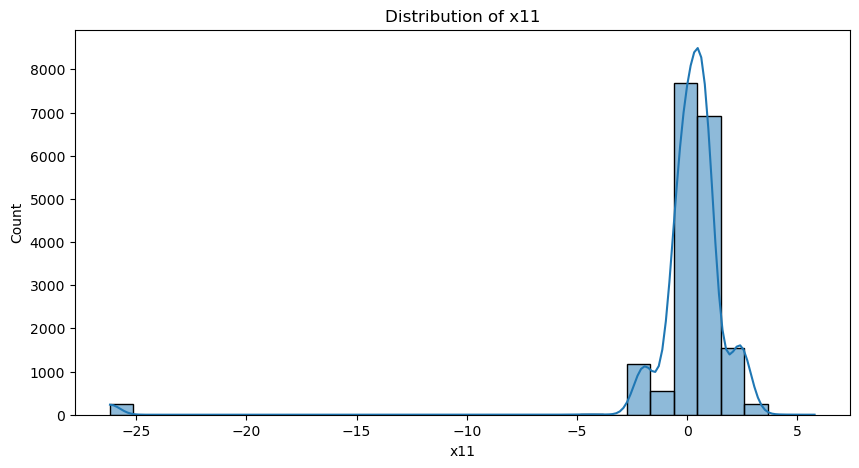

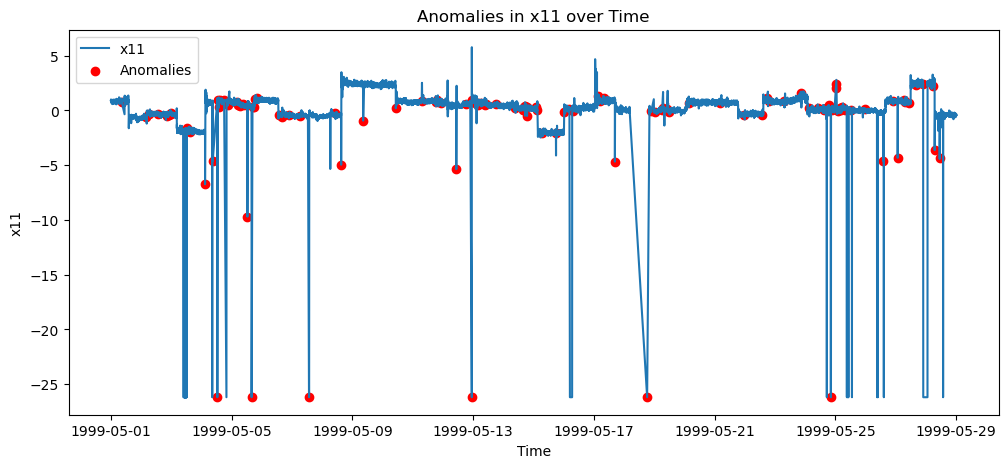

Analyzing Feature: x12


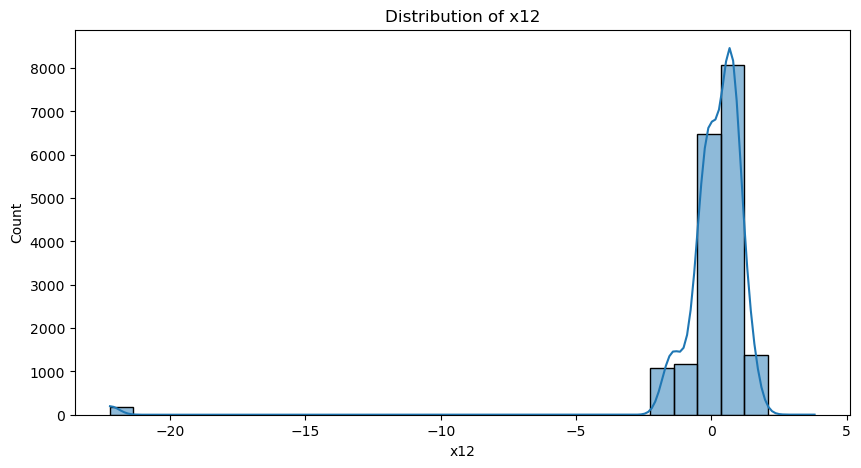

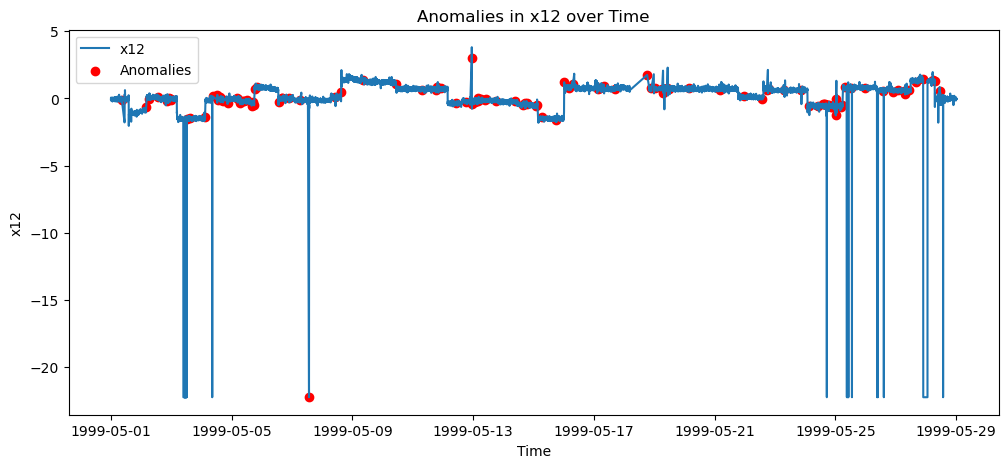

Analyzing Feature: x13


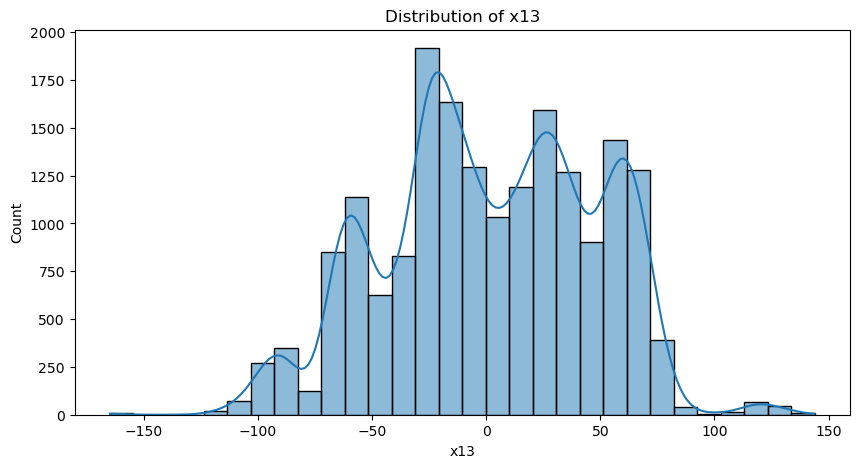

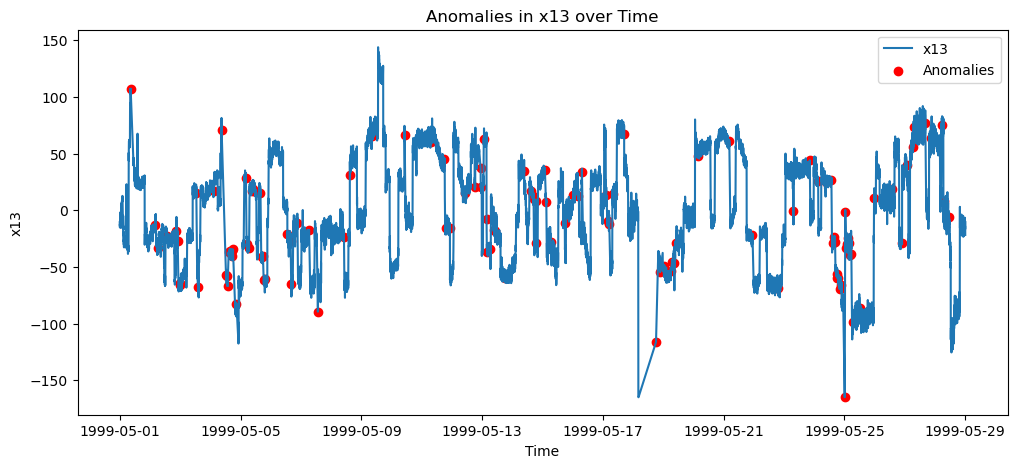

Analyzing Feature: x14


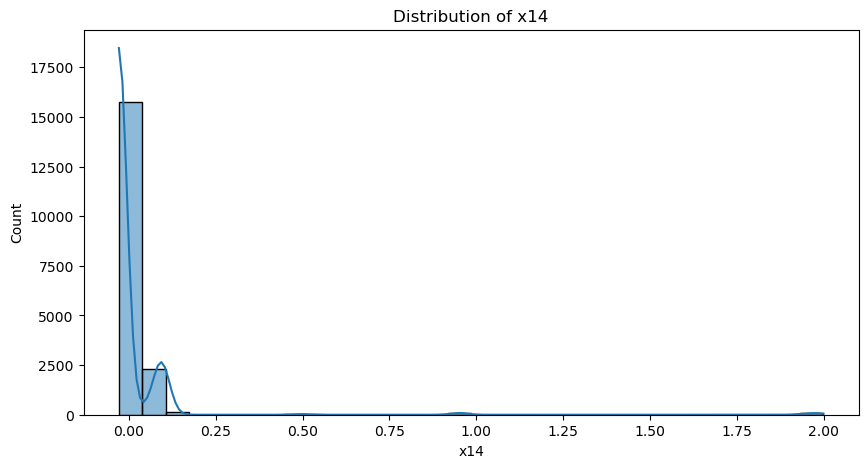

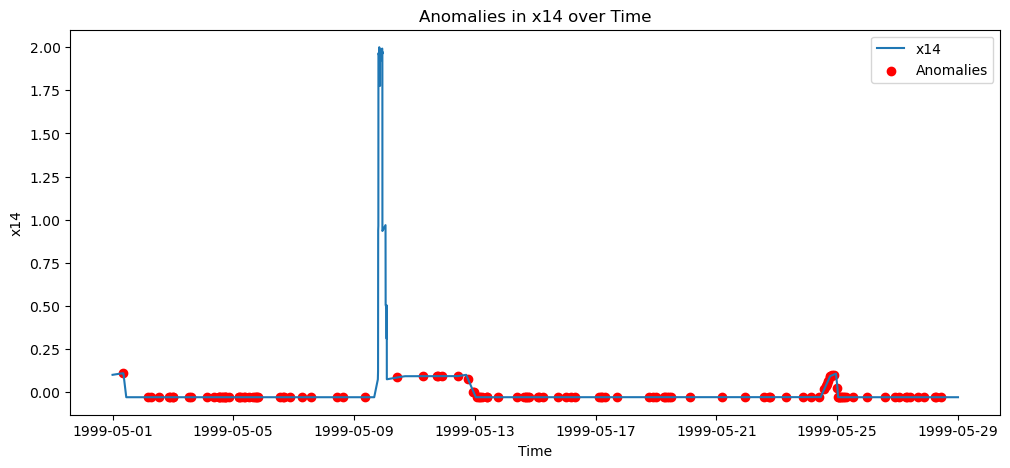

Analyzing Feature: x15


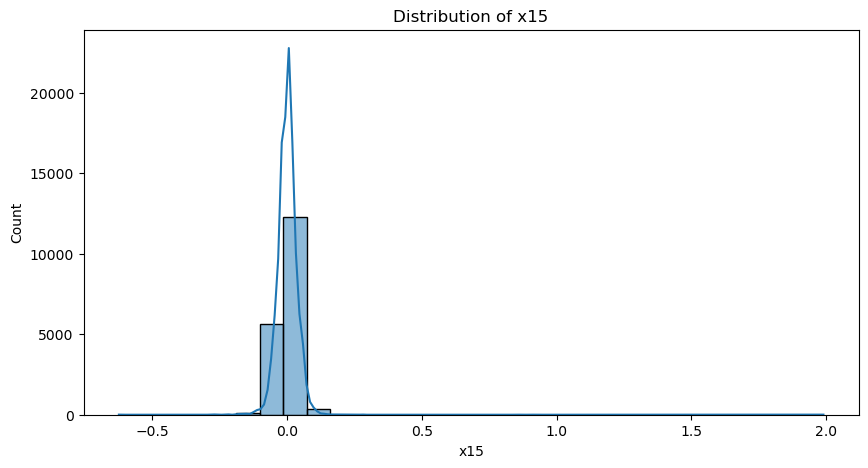

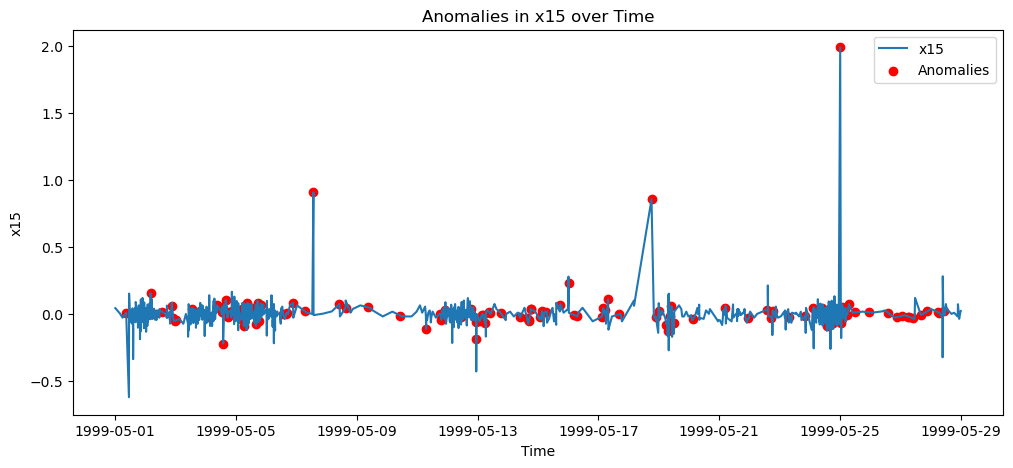

Analyzing Feature: x16


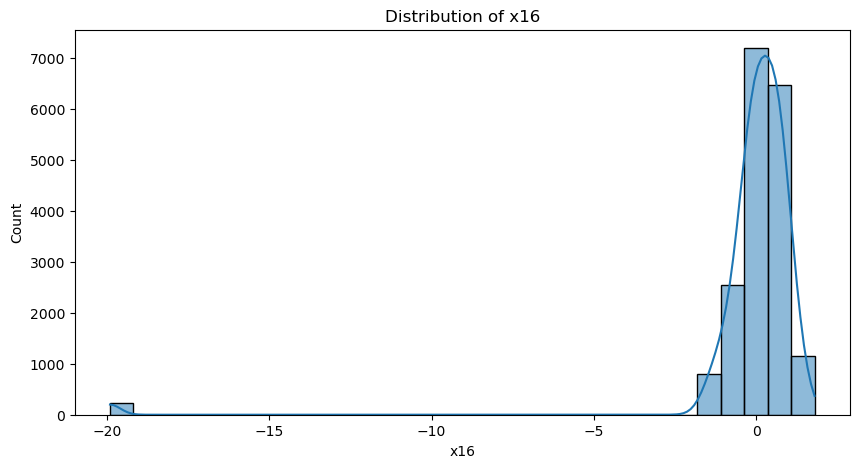

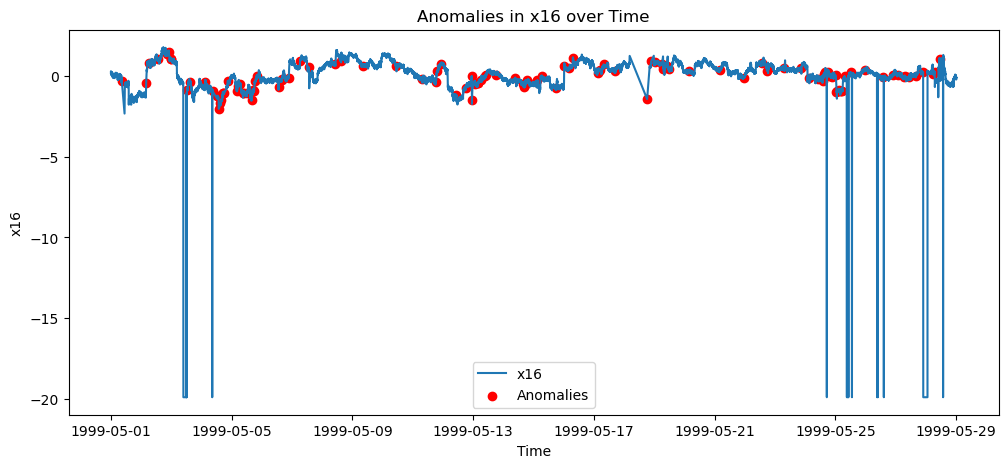

Analyzing Feature: x17


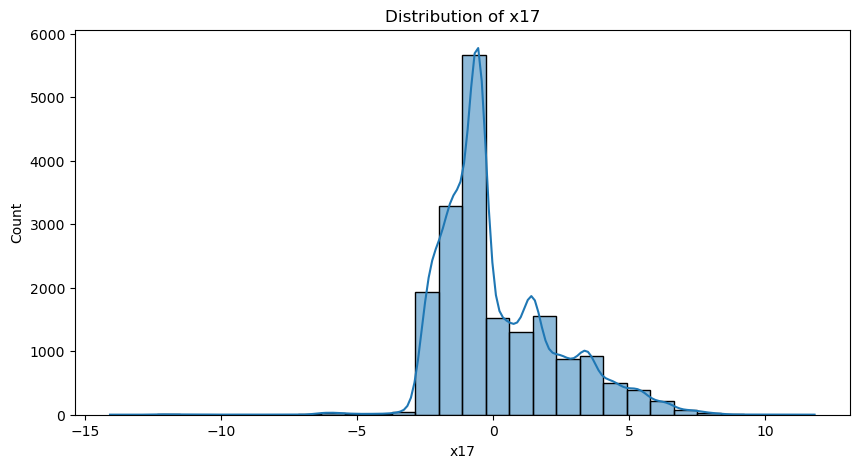

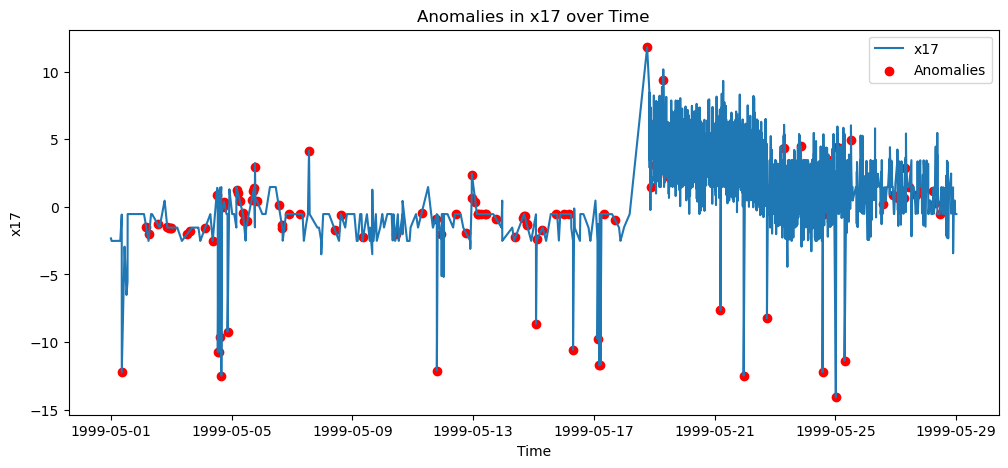

Analyzing Feature: x18


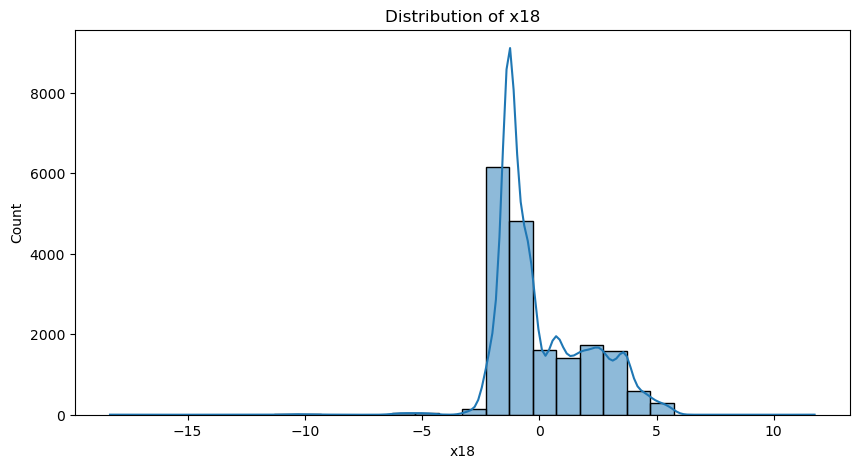

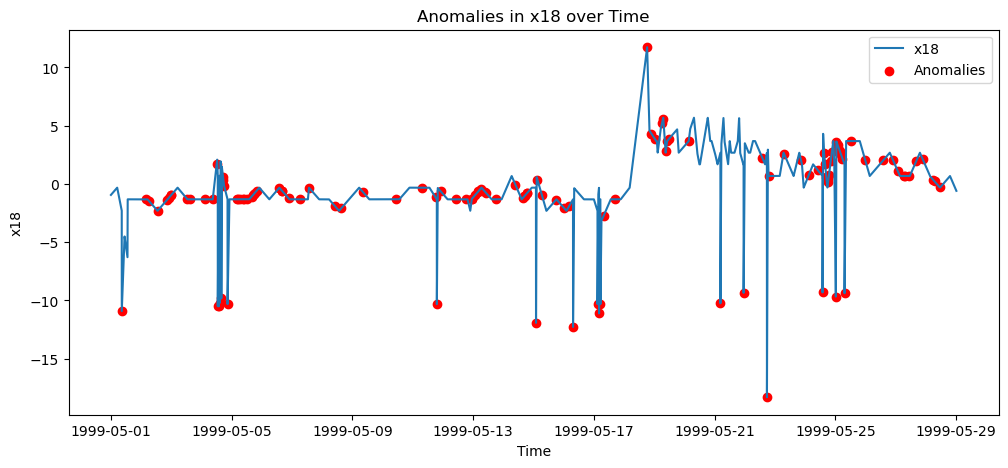

Analyzing Feature: x19


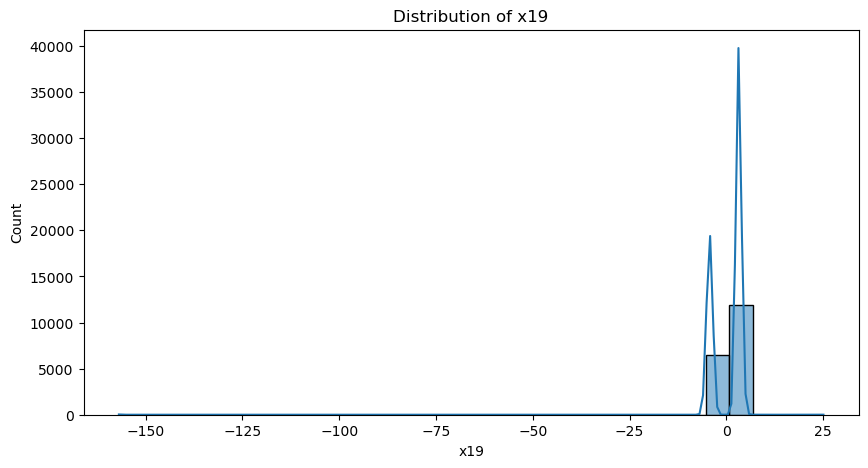

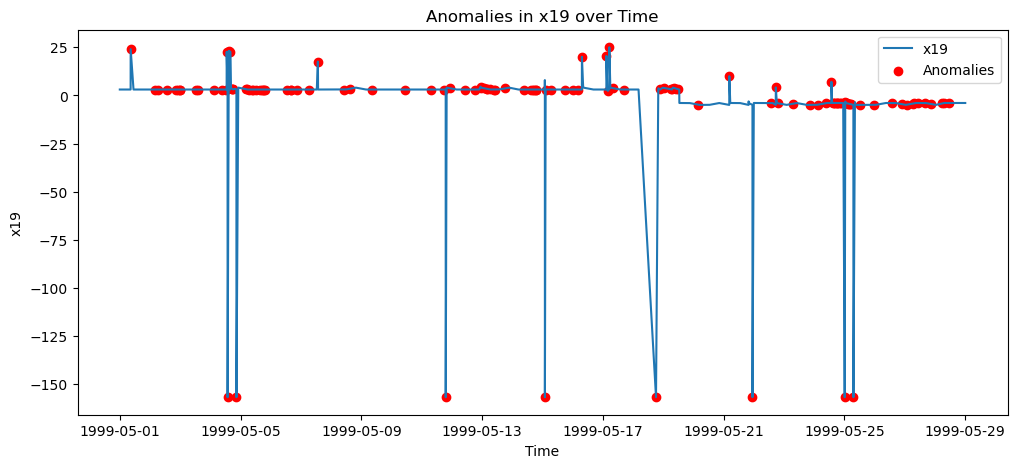

Analyzing Feature: x2


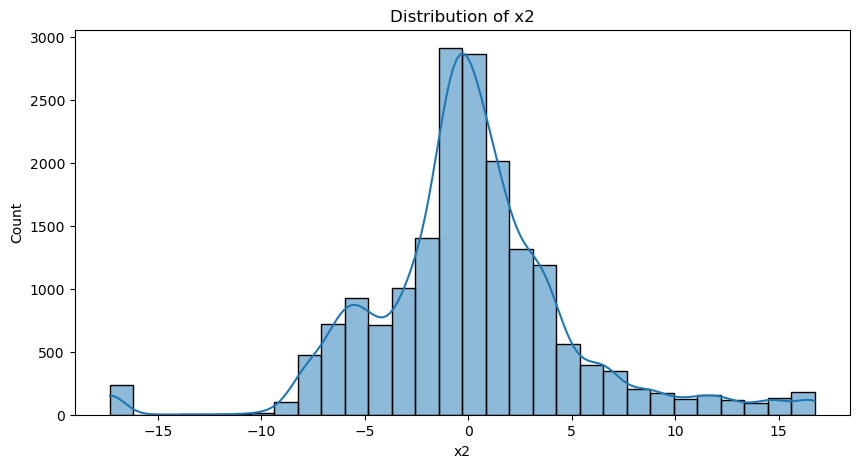

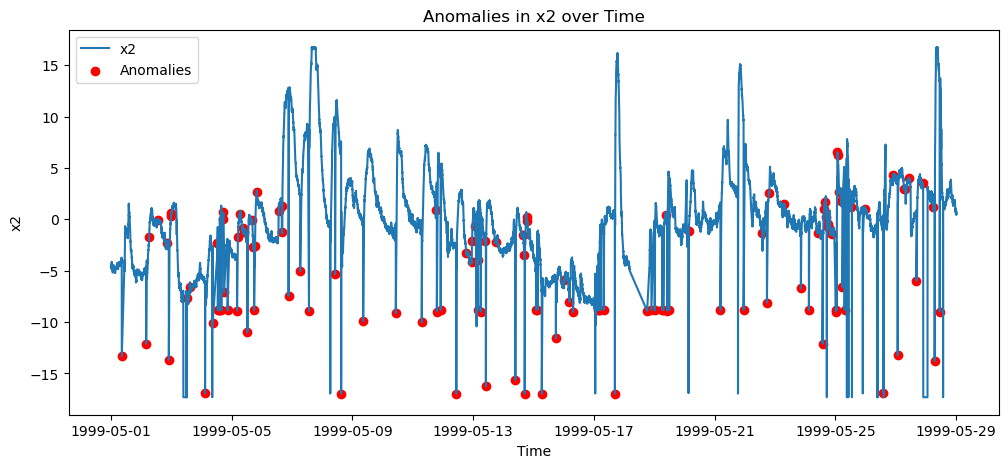

Analyzing Feature: x20


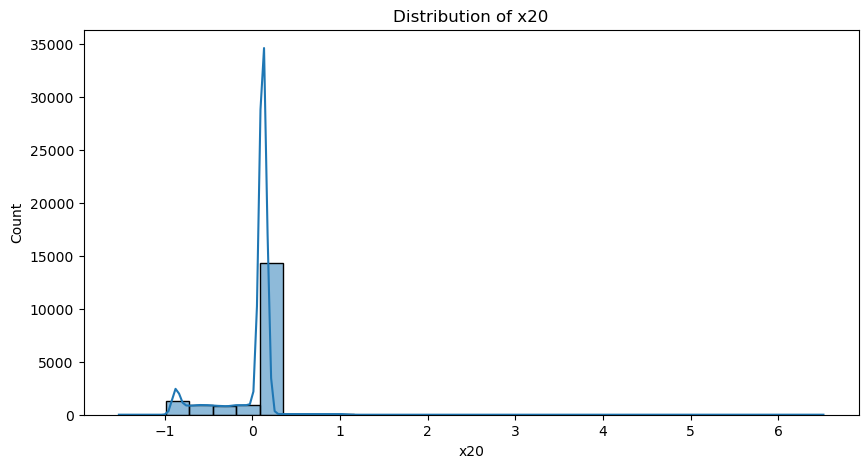

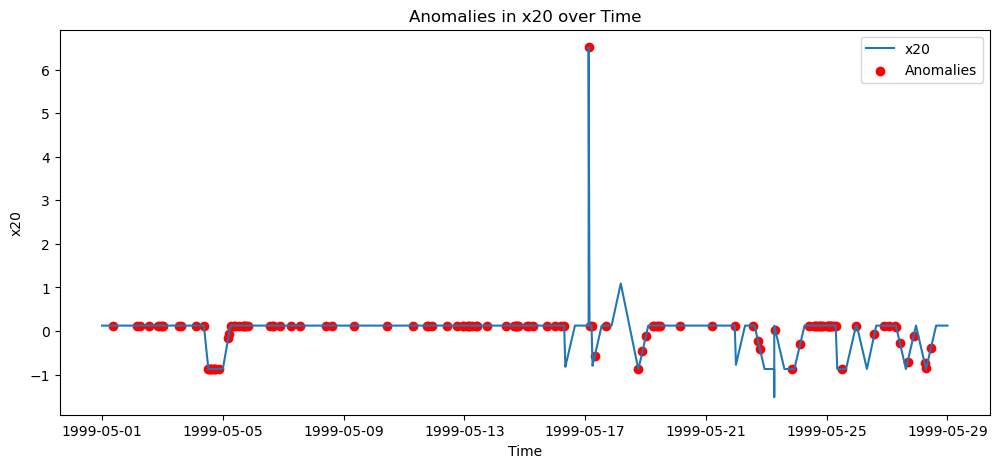

Analyzing Feature: x21


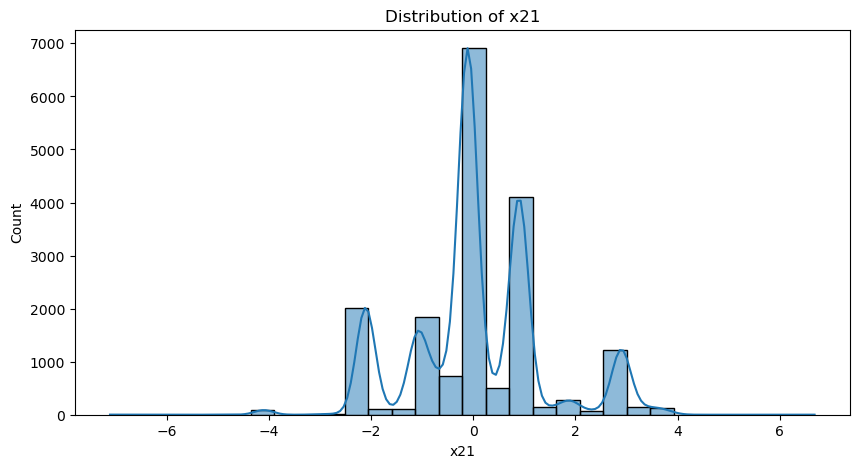

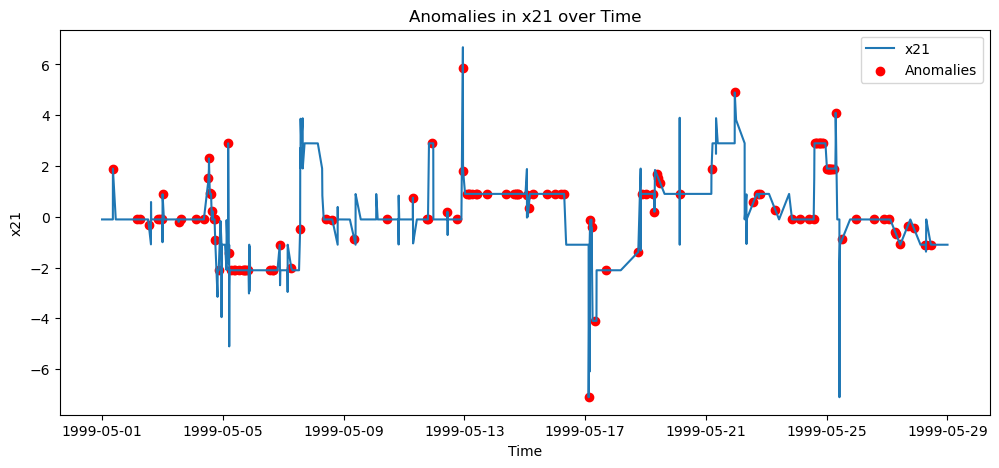

Analyzing Feature: x22


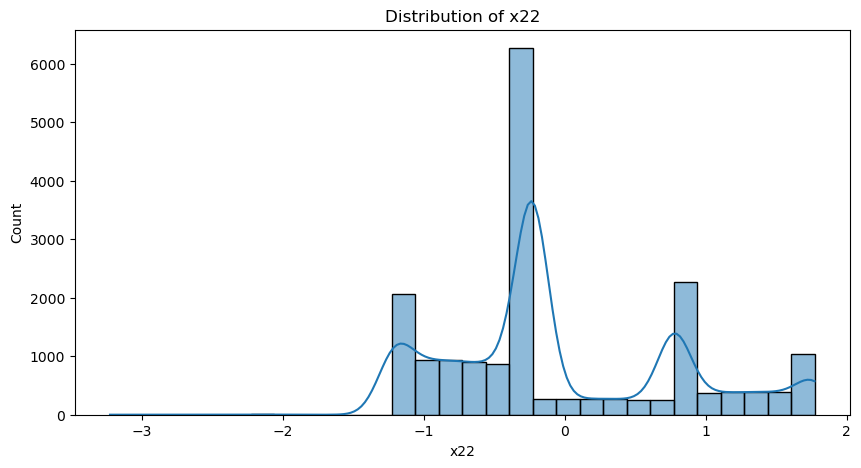

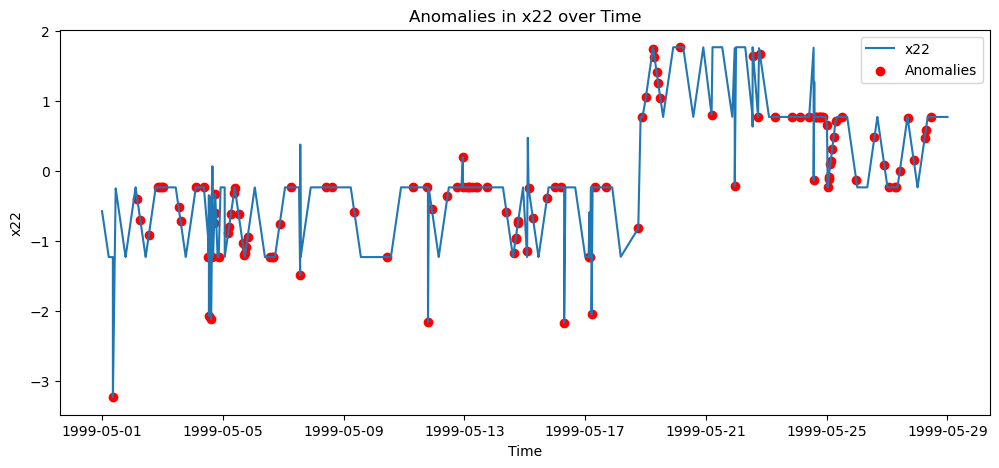

Analyzing Feature: x23


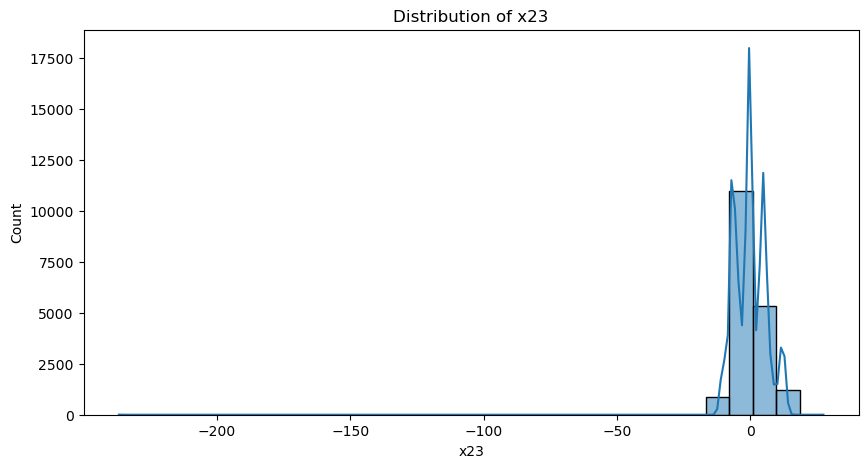

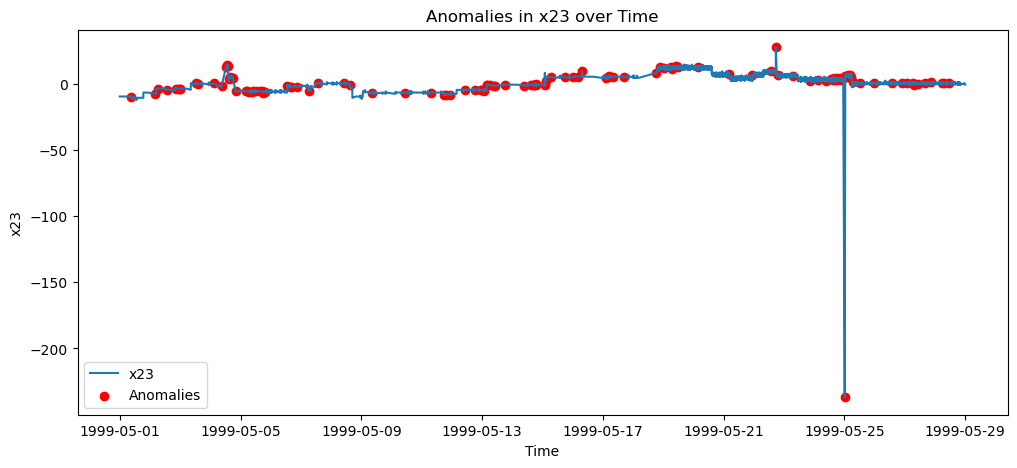

Analyzing Feature: x24


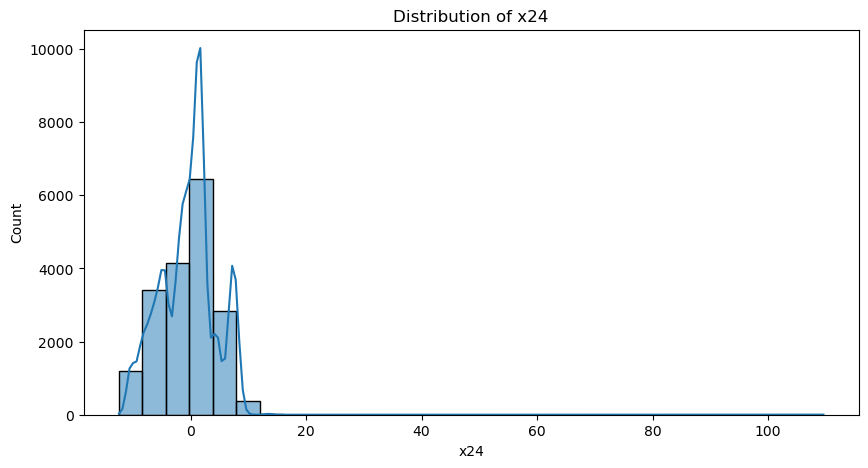

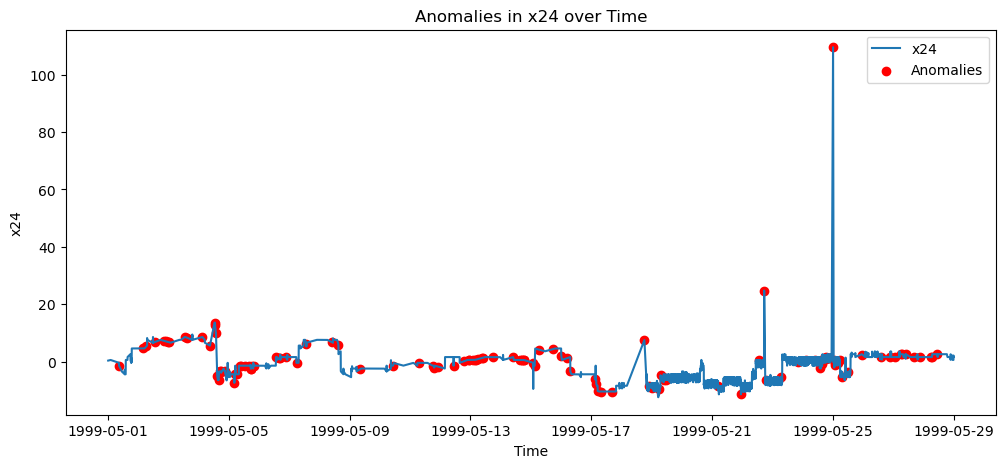

Analyzing Feature: x25


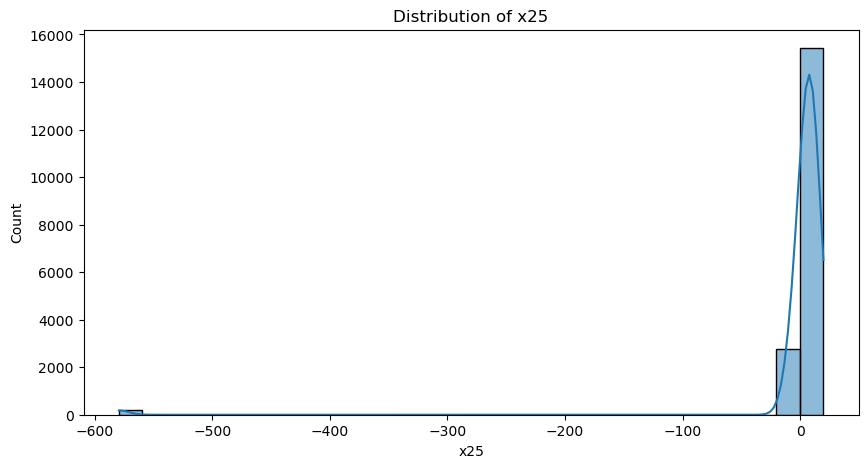

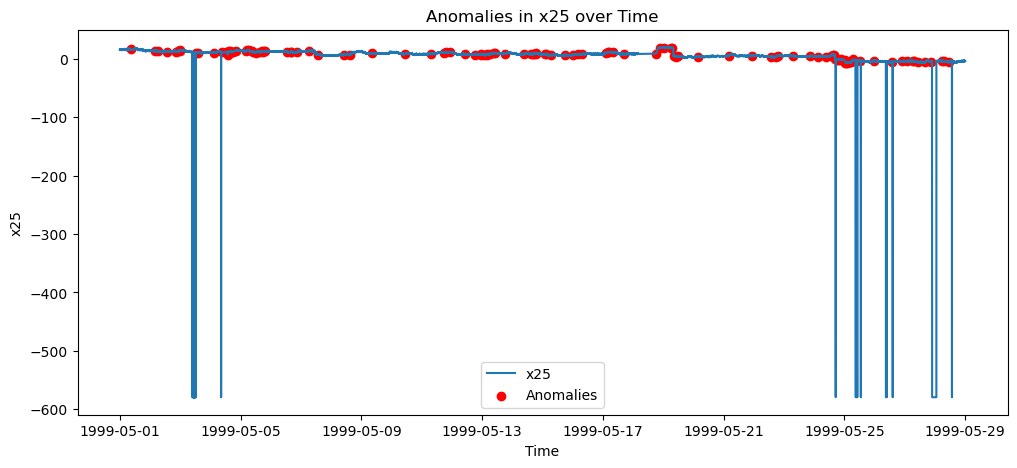

Analyzing Feature: x26


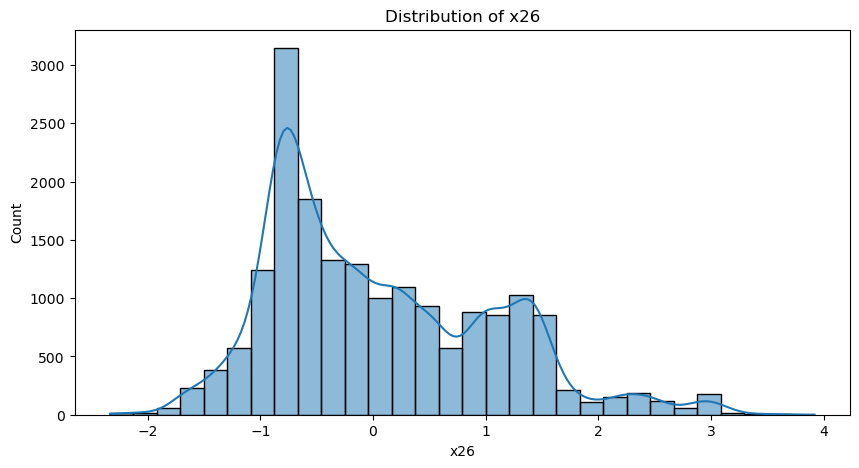

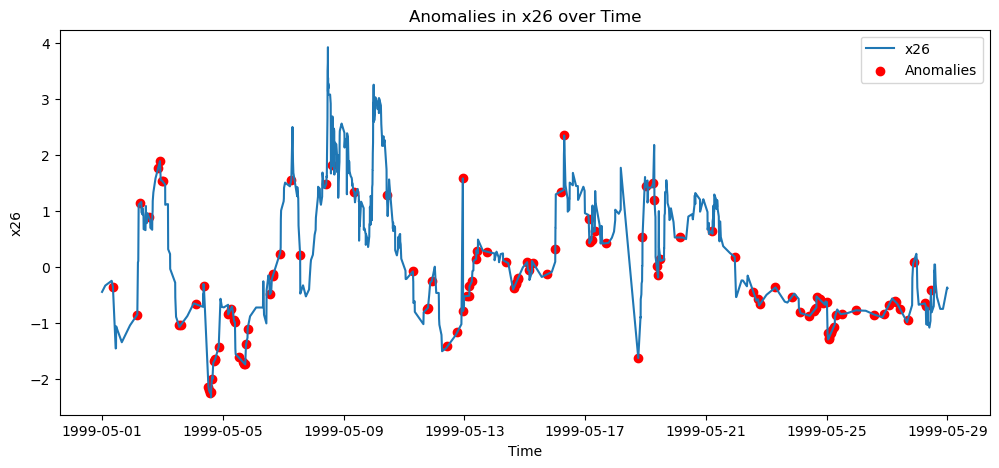

Analyzing Feature: x27


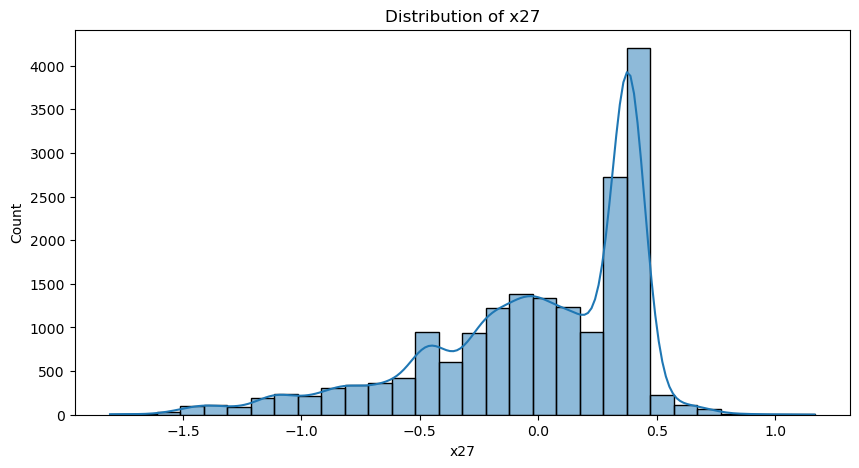

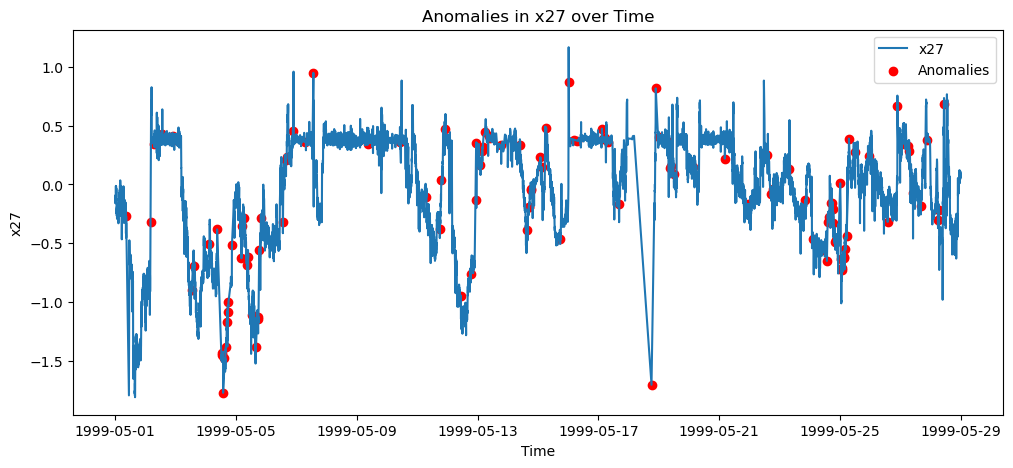

Analyzing Feature: x28


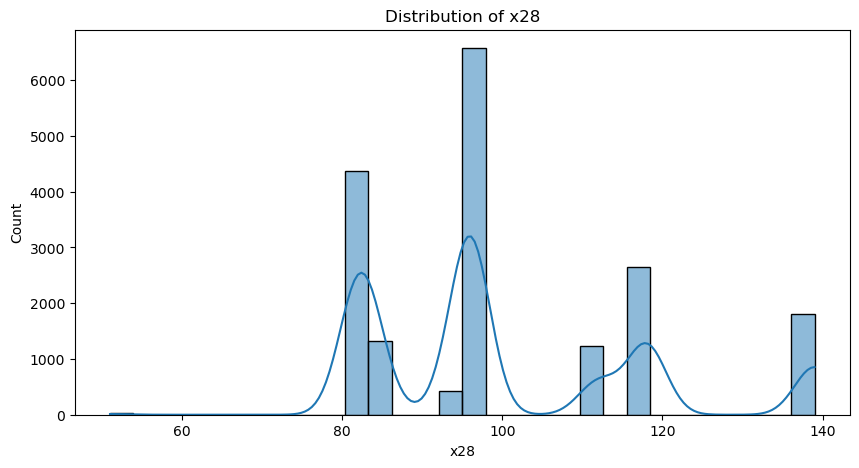

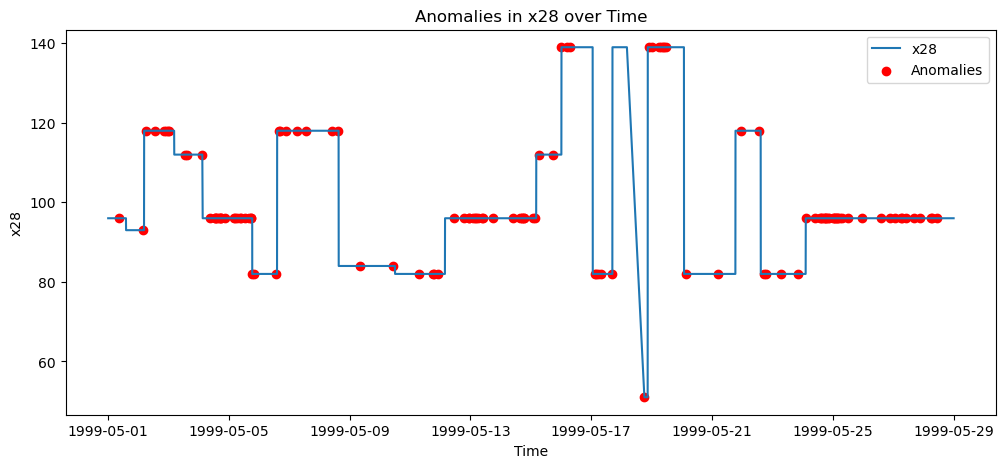

Analyzing Feature: x29


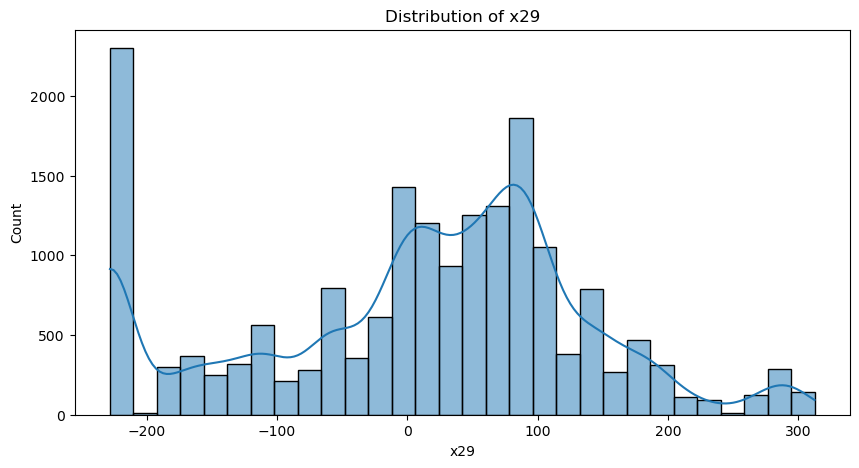

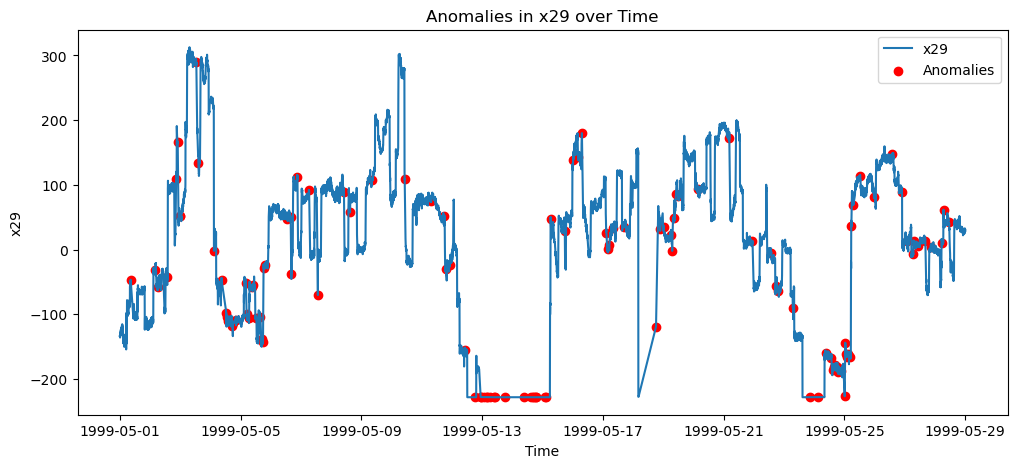

Analyzing Feature: x3


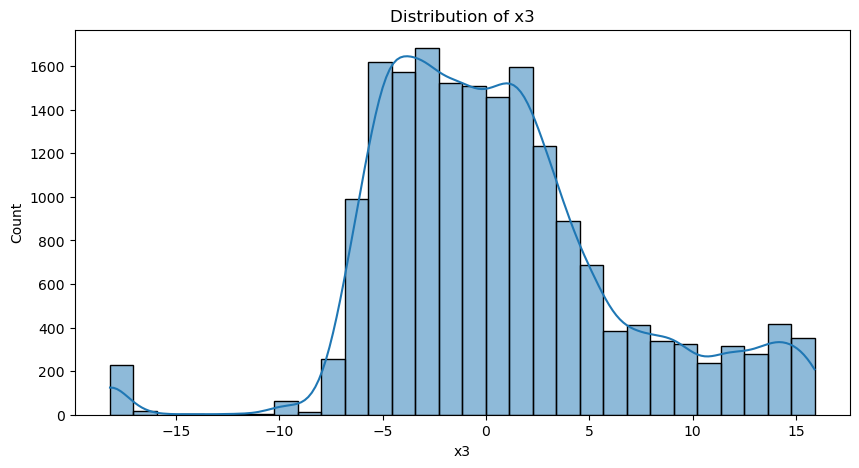

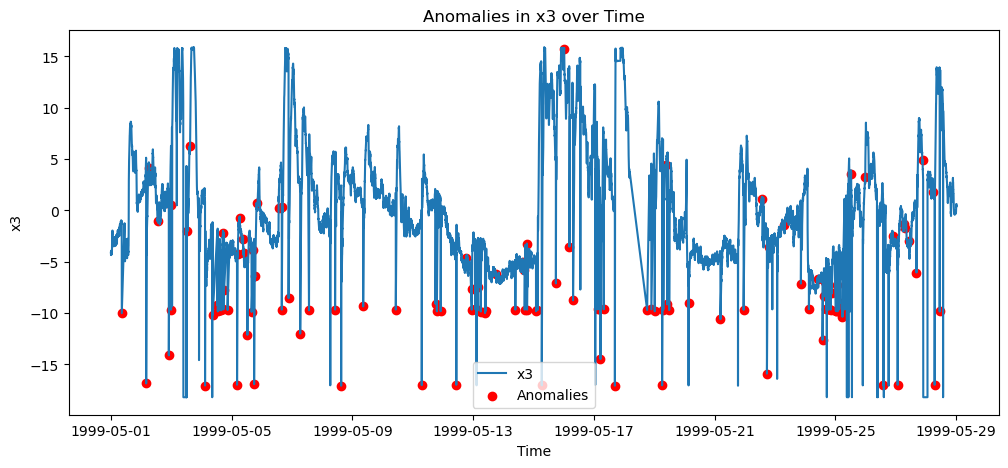

Analyzing Feature: x30


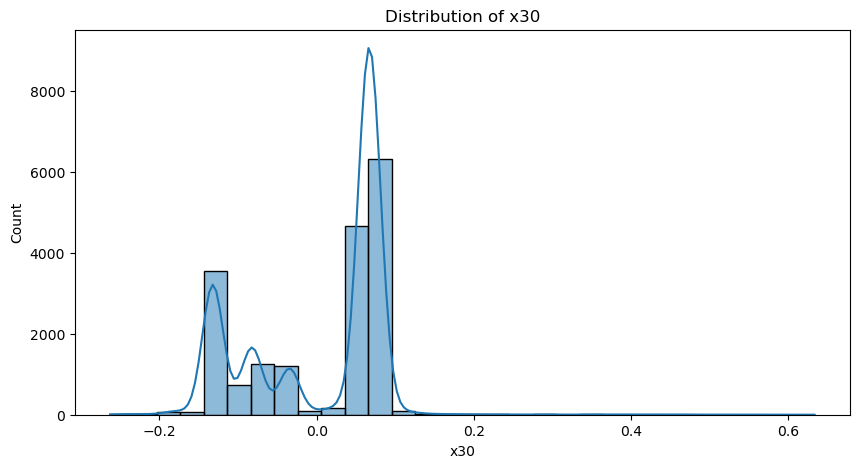

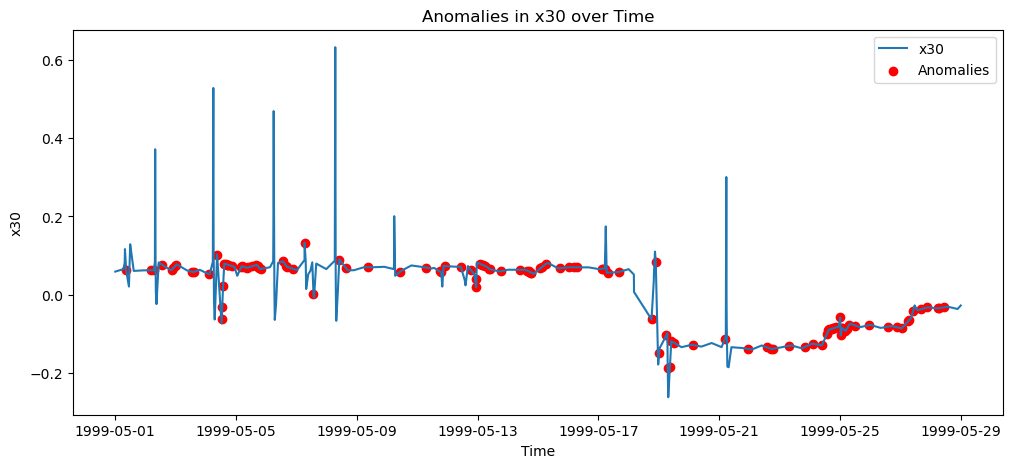

Analyzing Feature: x31


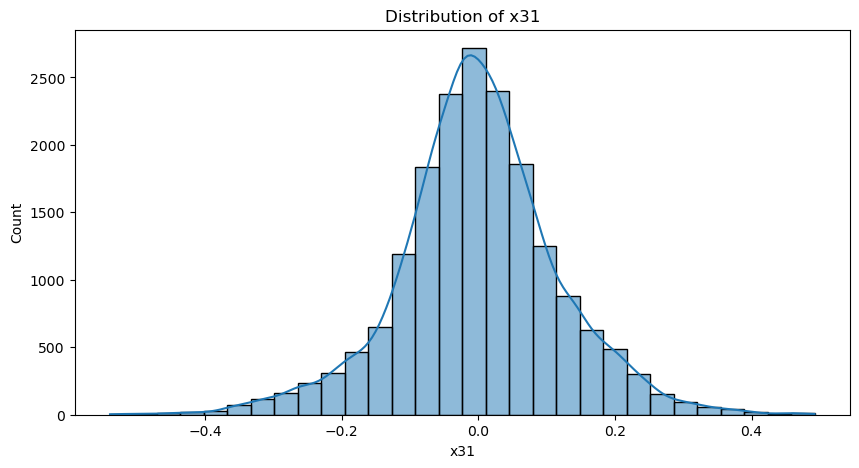

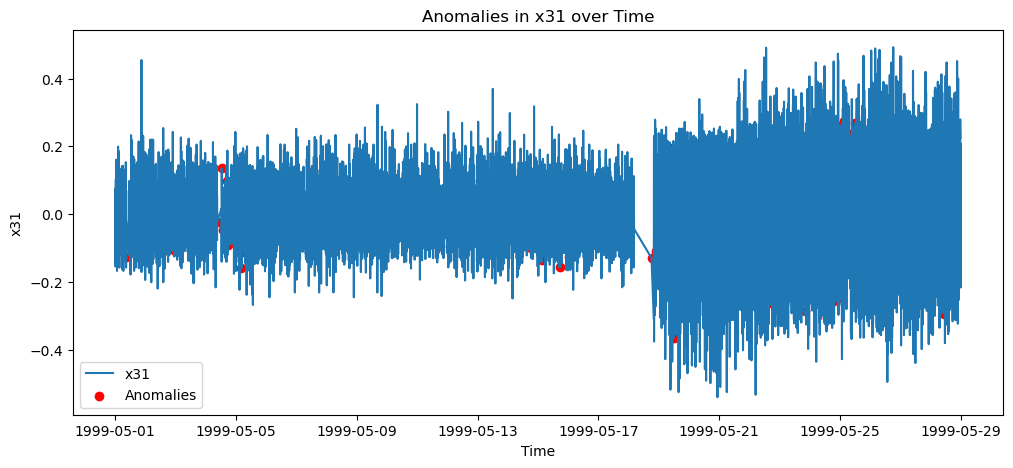

Analyzing Feature: x32


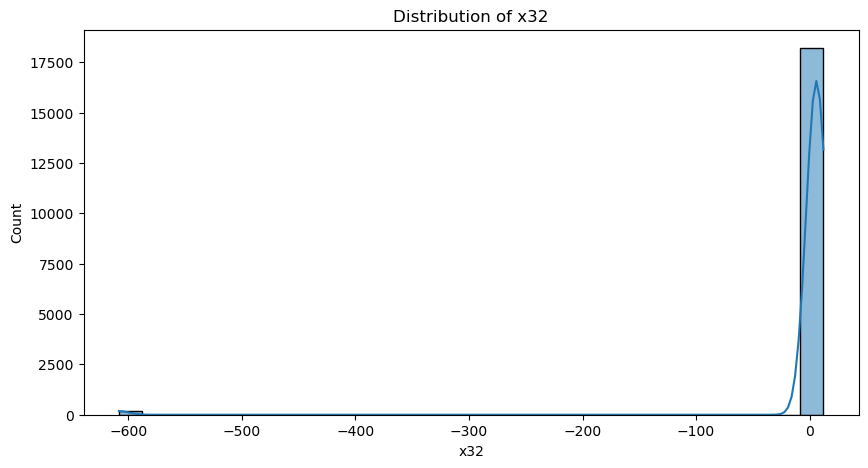

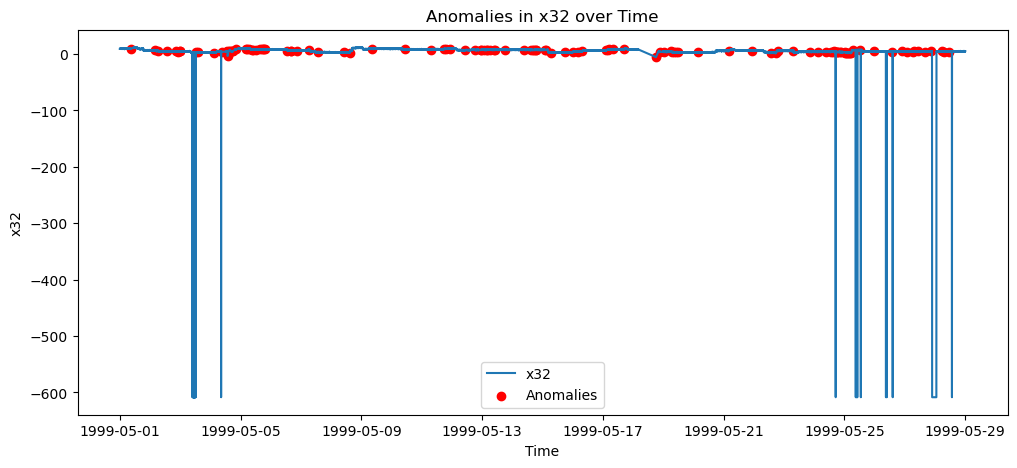

Analyzing Feature: x33


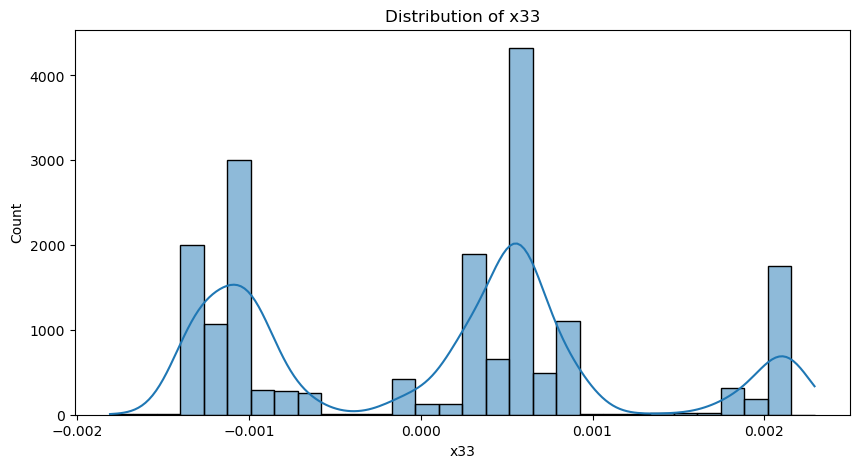

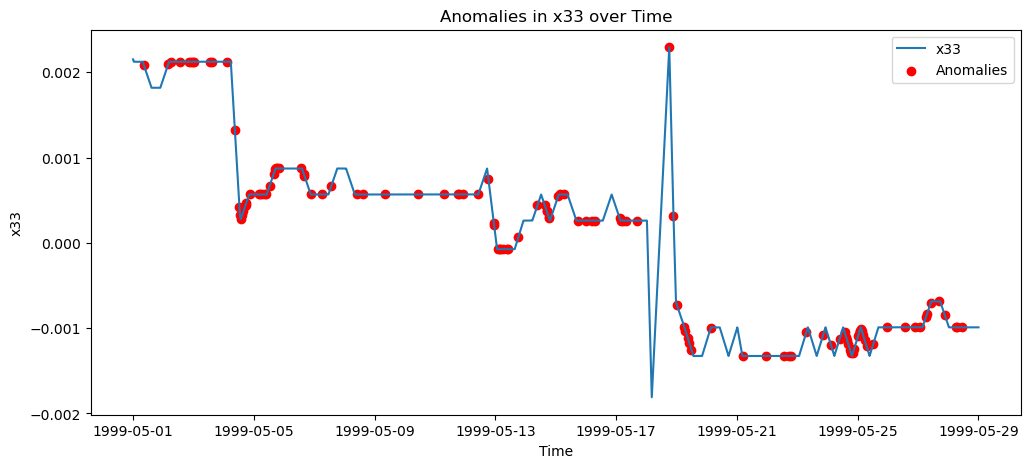

Analyzing Feature: x34


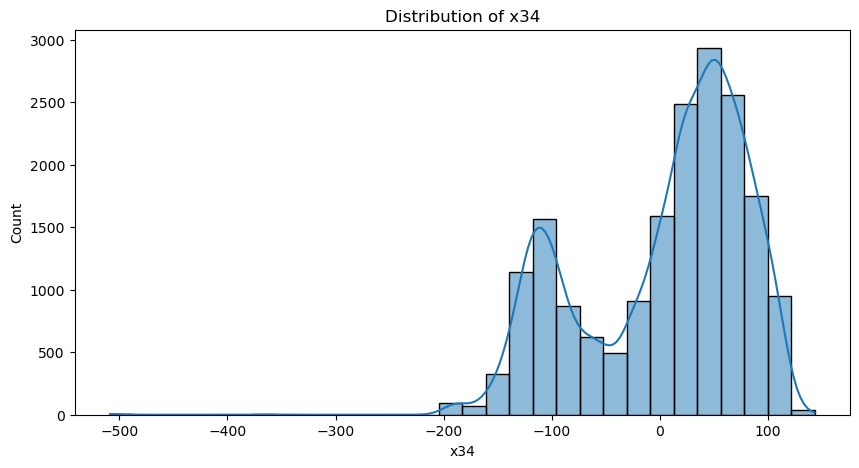

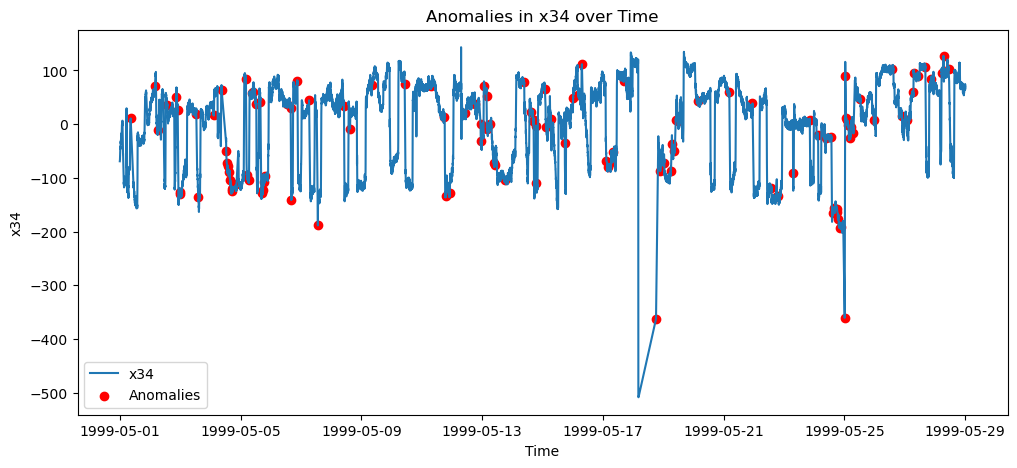

Analyzing Feature: x35


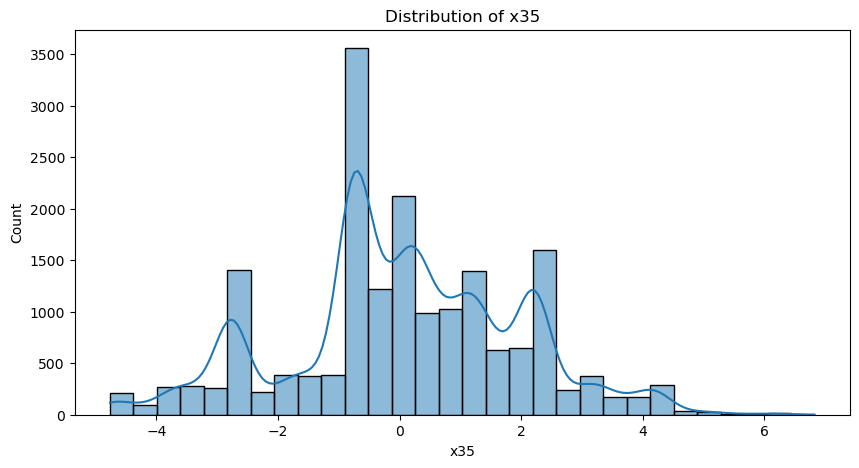

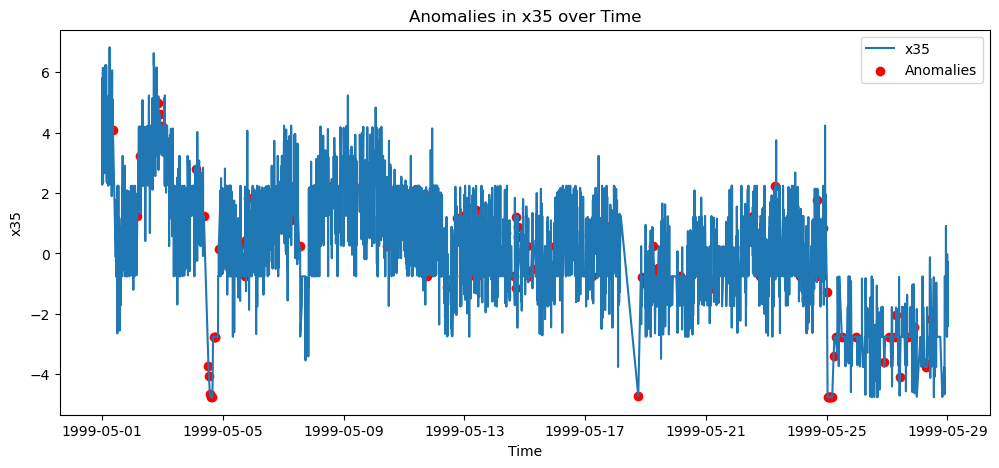

Analyzing Feature: x36


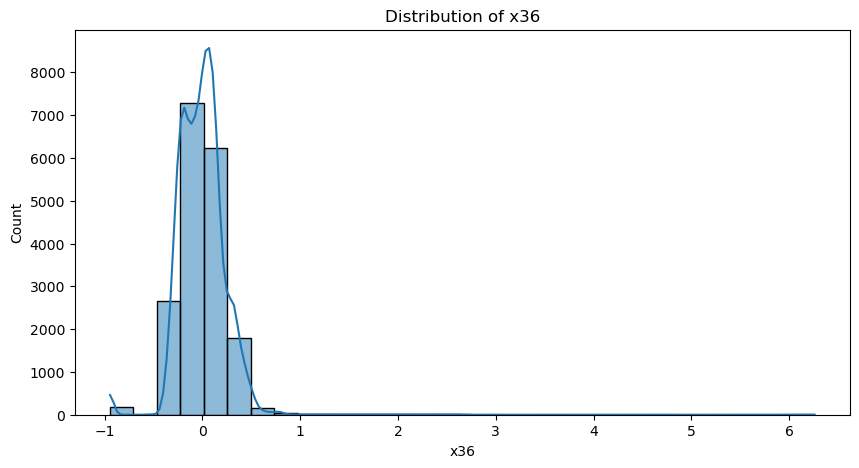

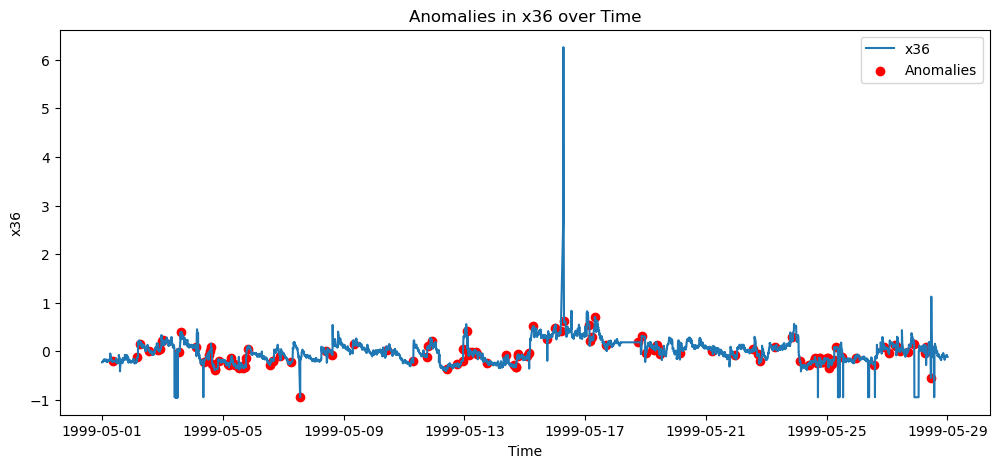

Analyzing Feature: x37


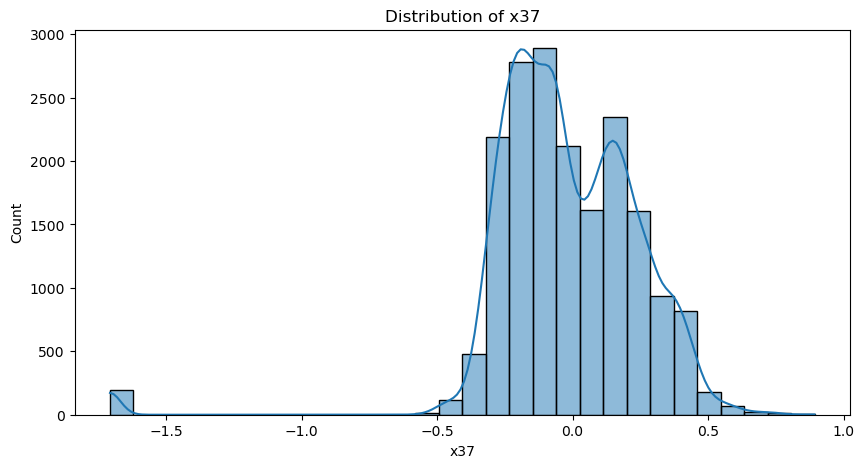

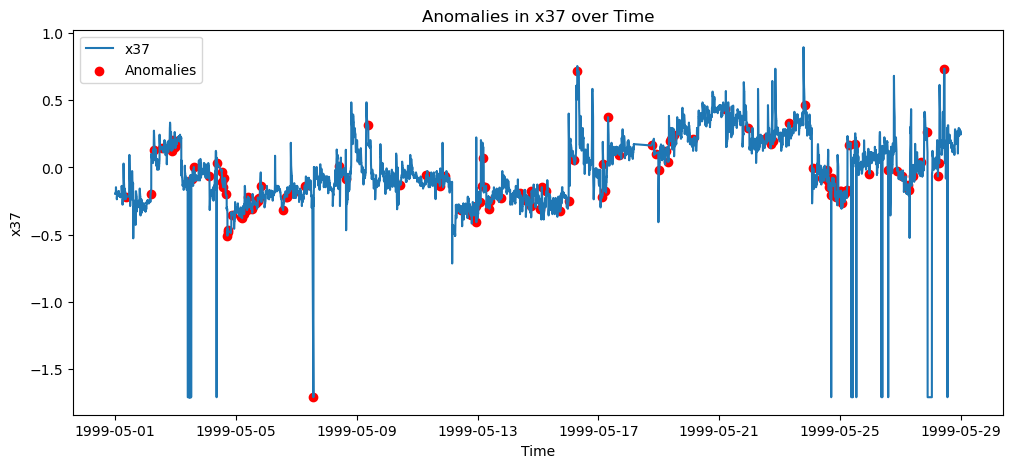

Analyzing Feature: x38


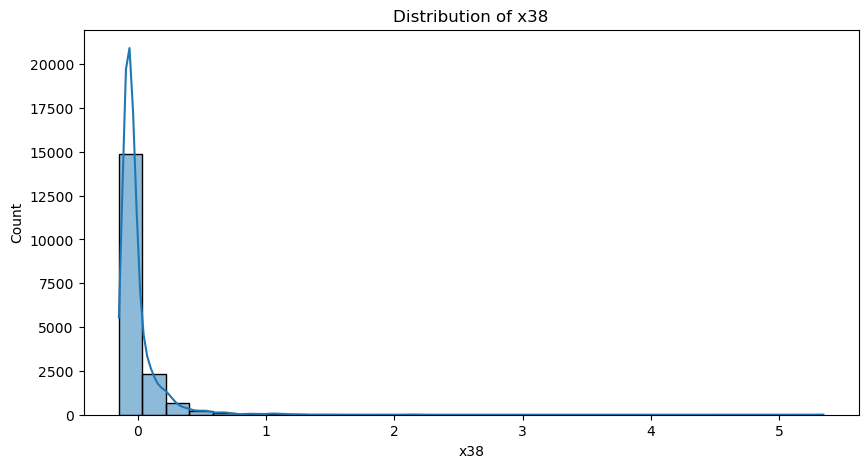

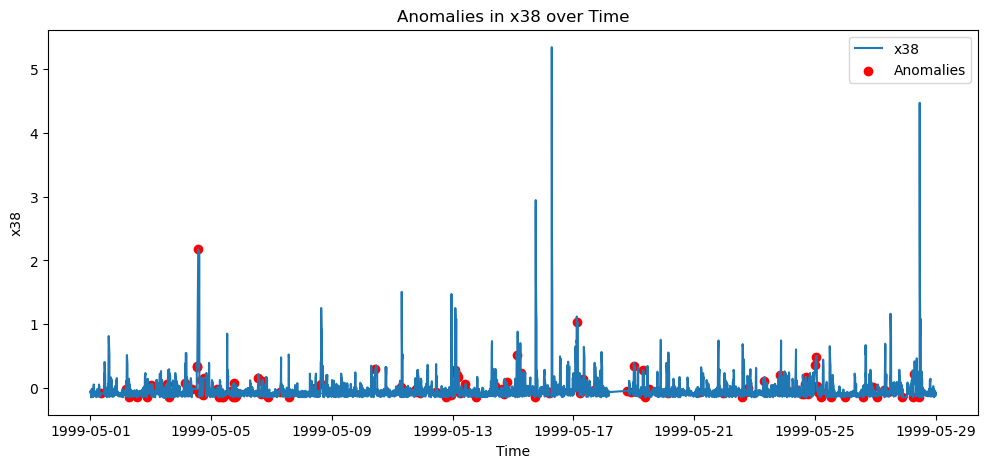

Analyzing Feature: x39


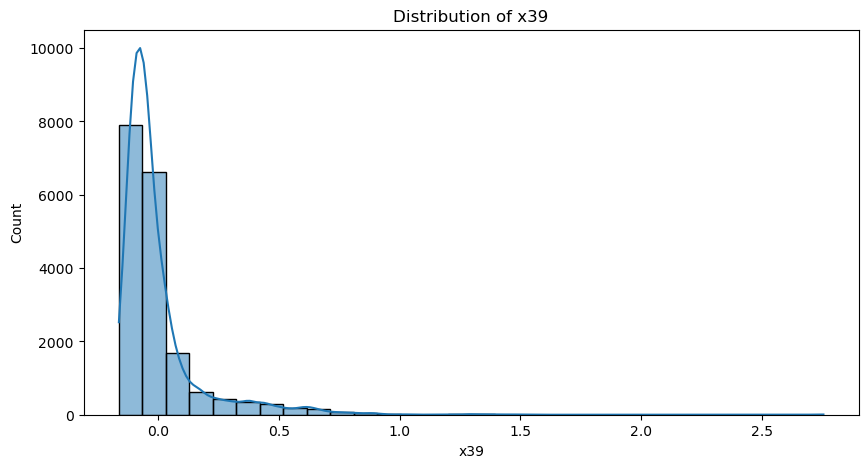

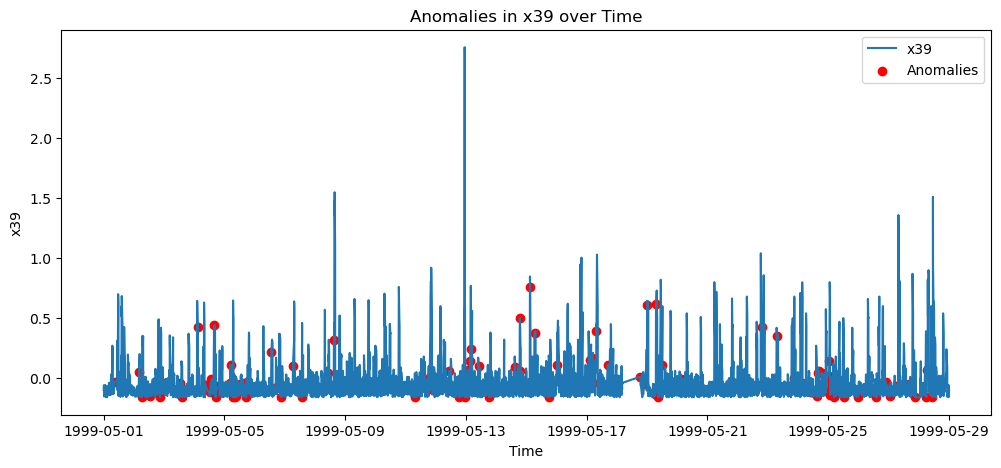

Analyzing Feature: x4


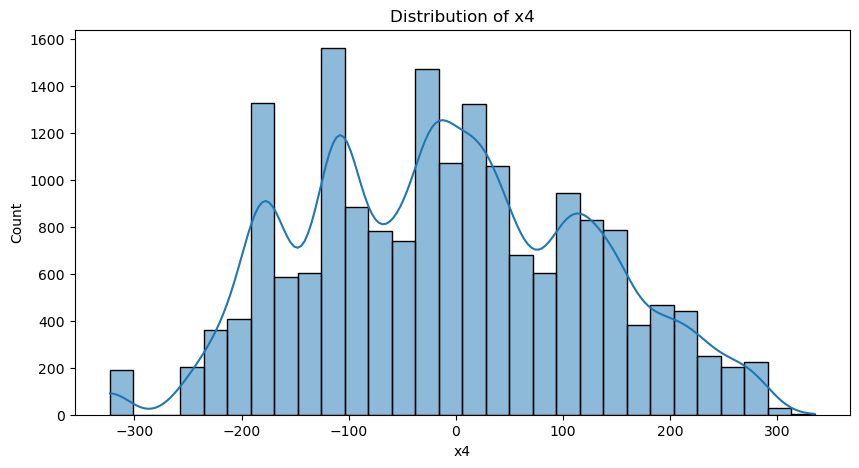

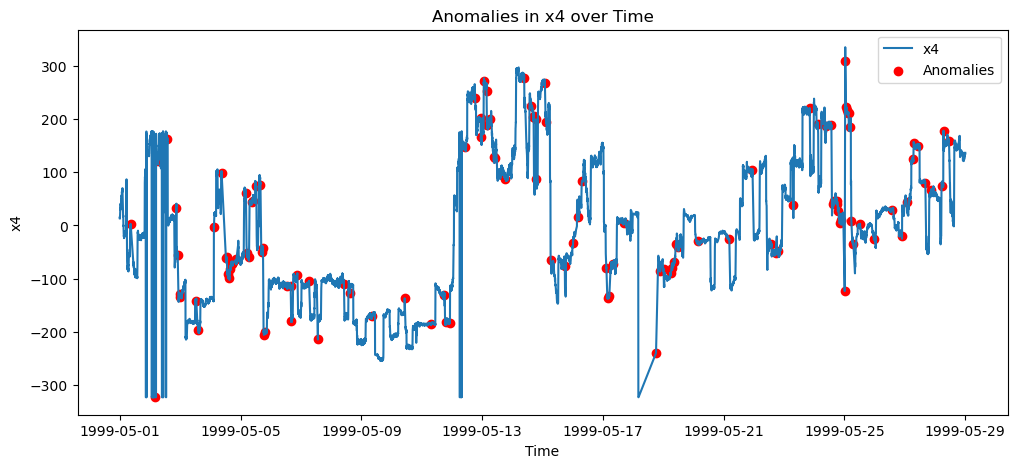

Analyzing Feature: x40


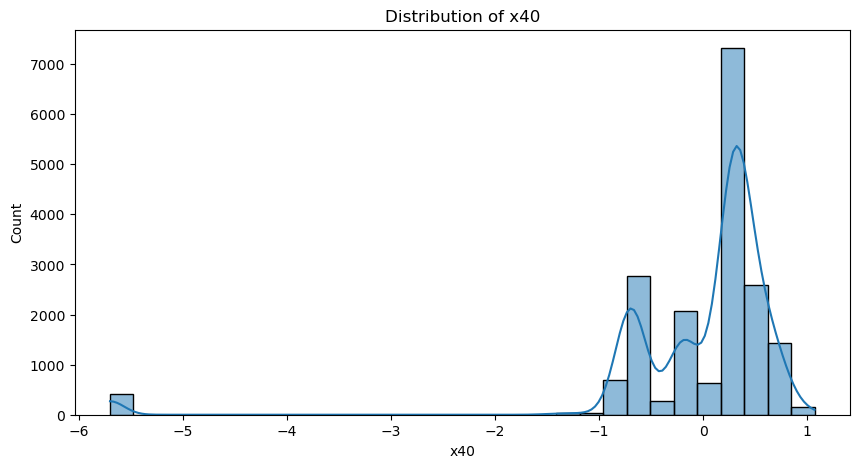

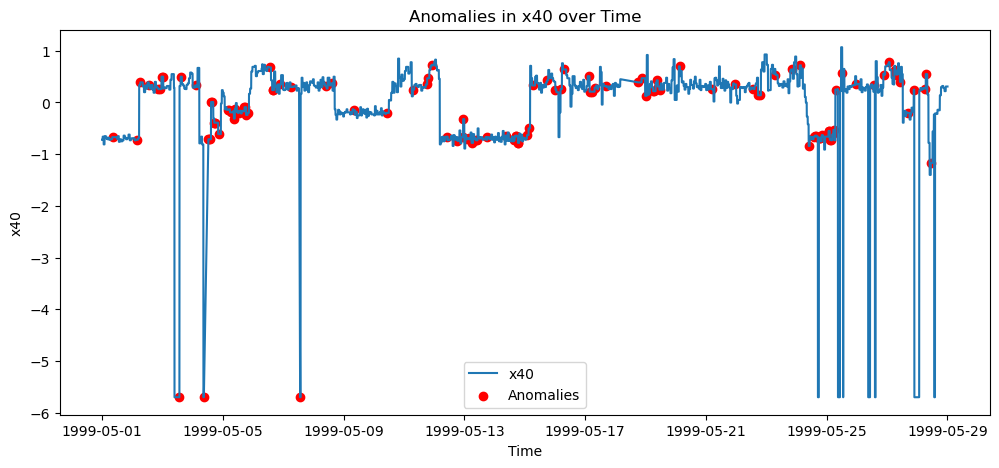

Analyzing Feature: x41


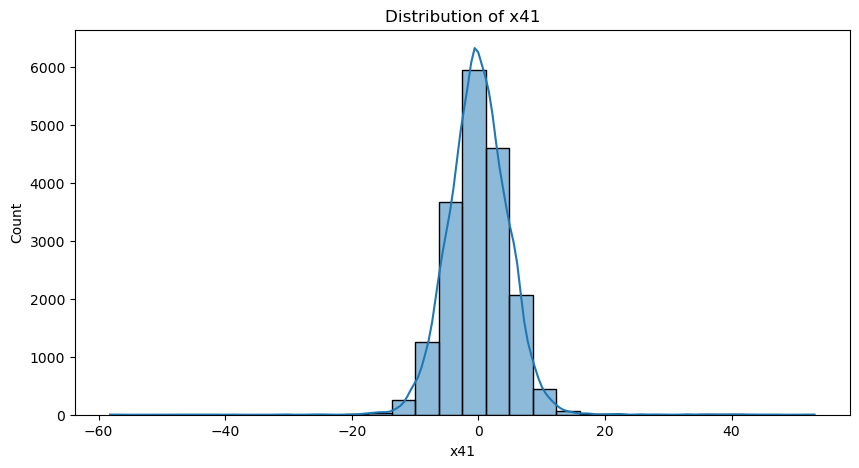

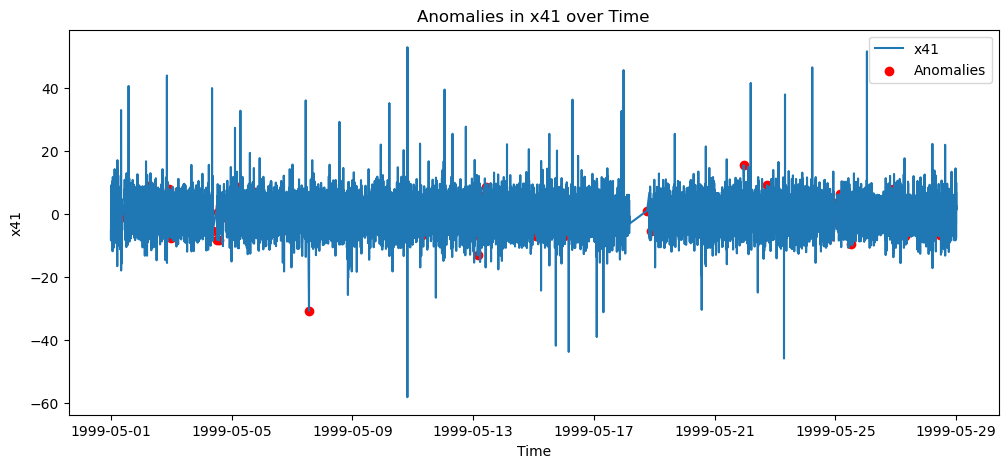

Analyzing Feature: x42


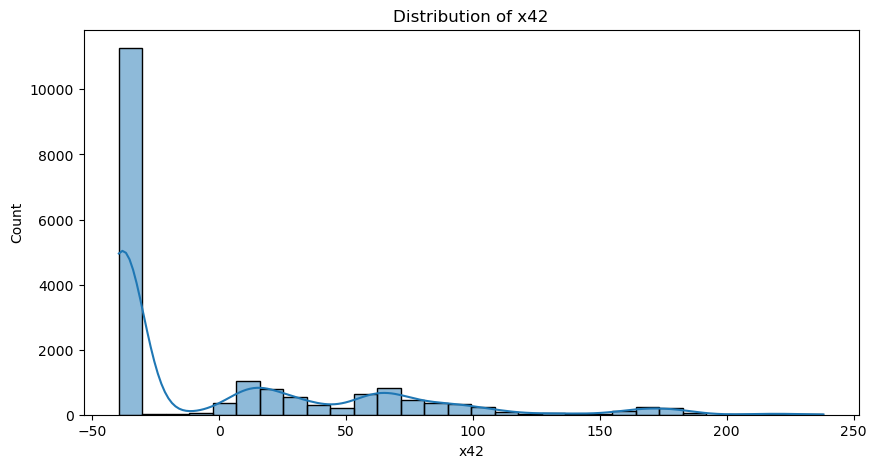

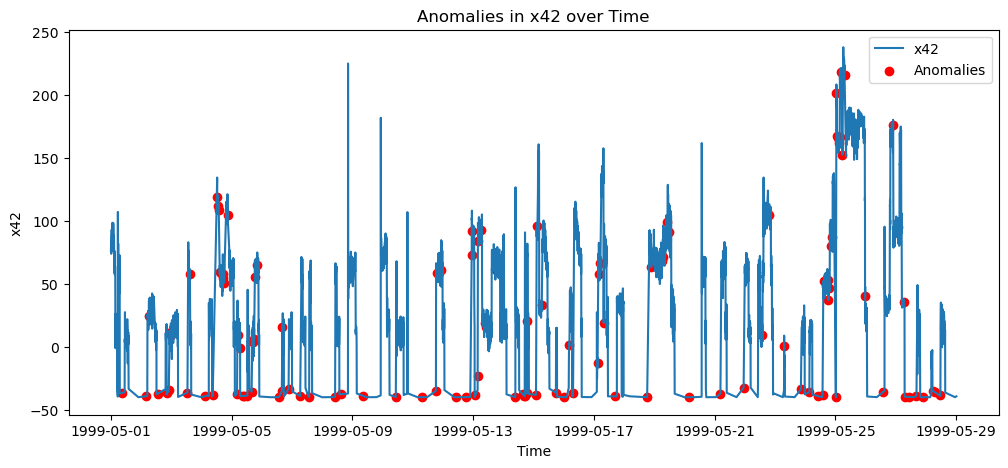

Analyzing Feature: x43


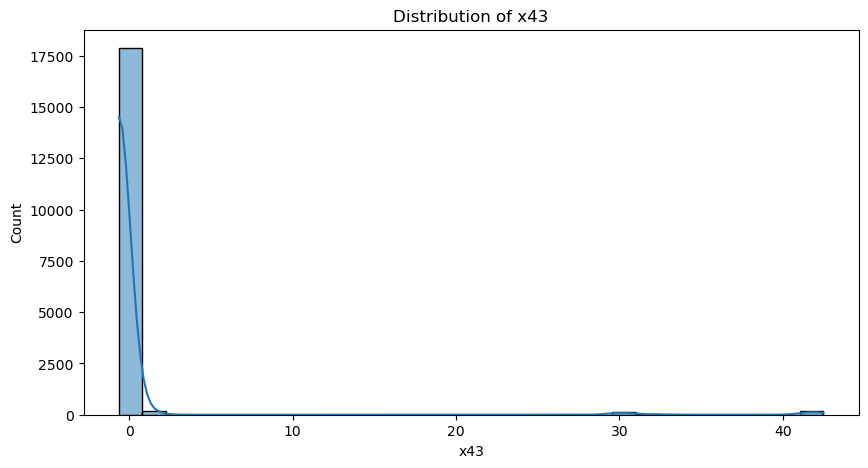

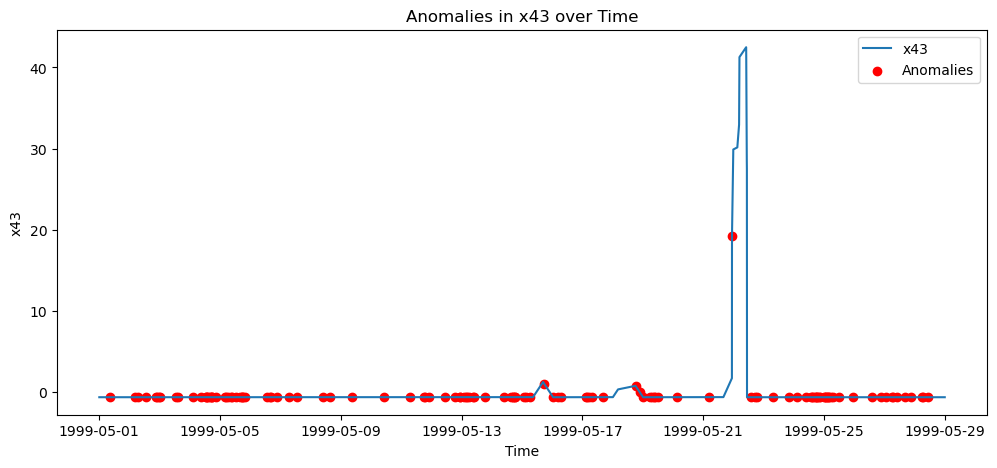

Analyzing Feature: x44


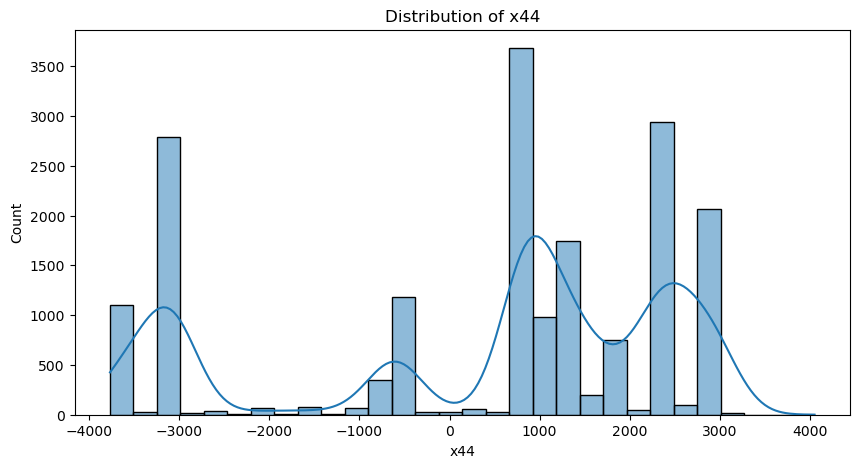

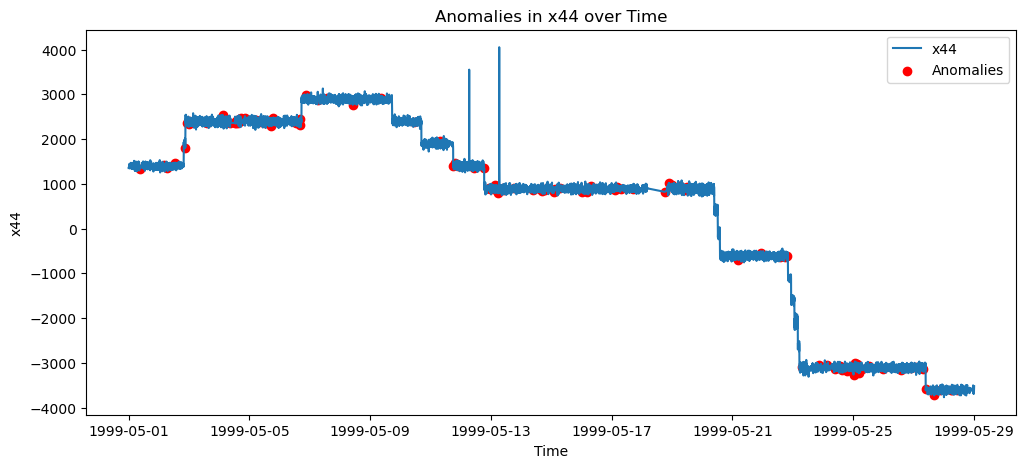

Analyzing Feature: x45


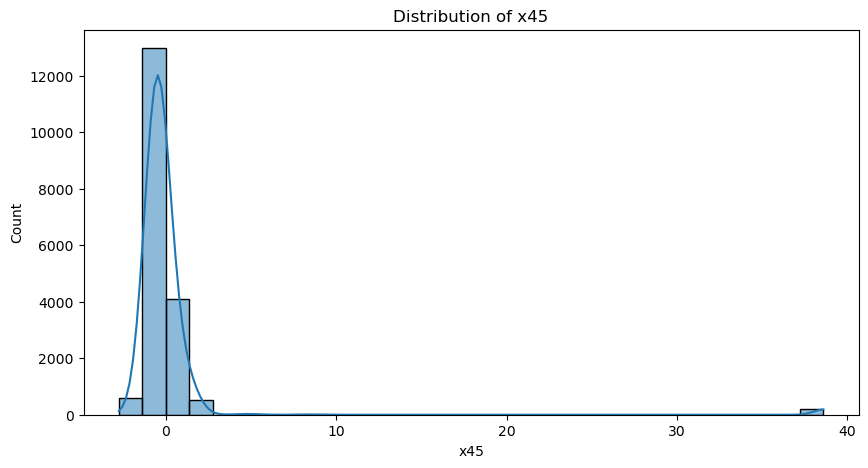

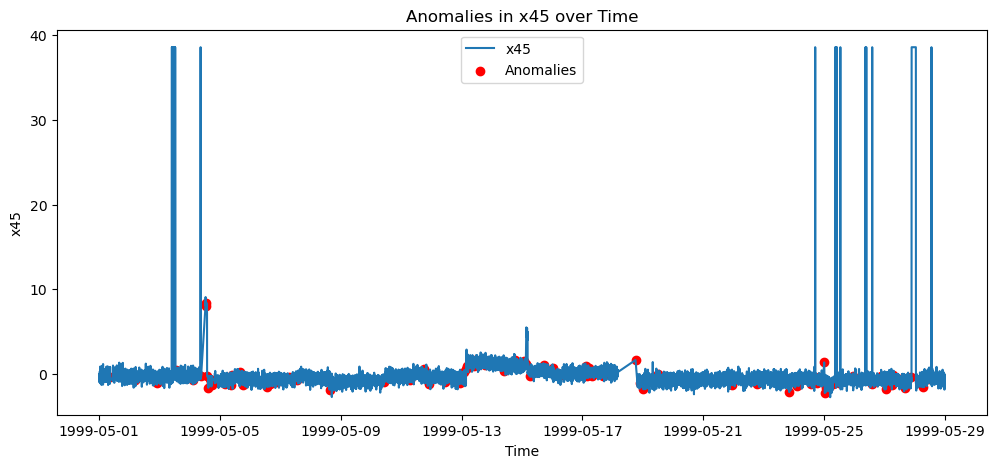

Analyzing Feature: x46


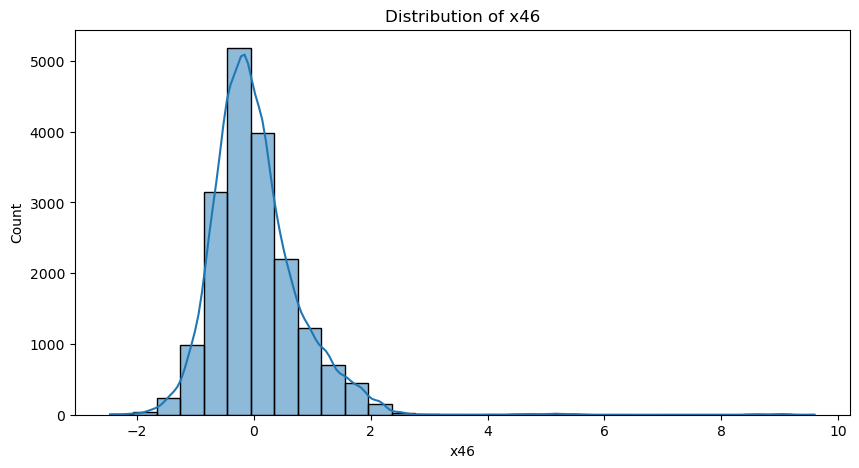

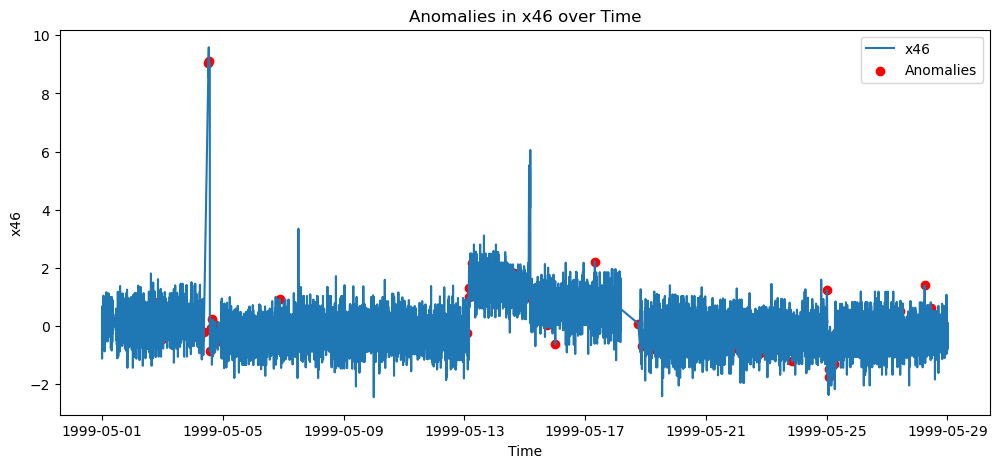

Analyzing Feature: x47


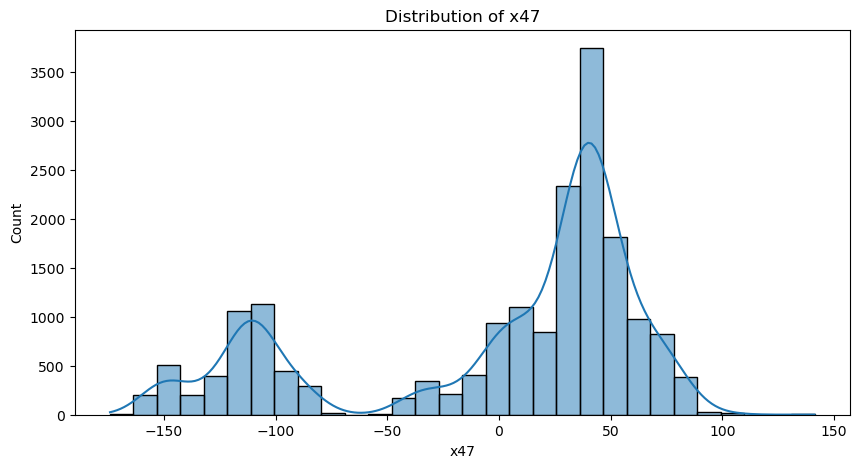

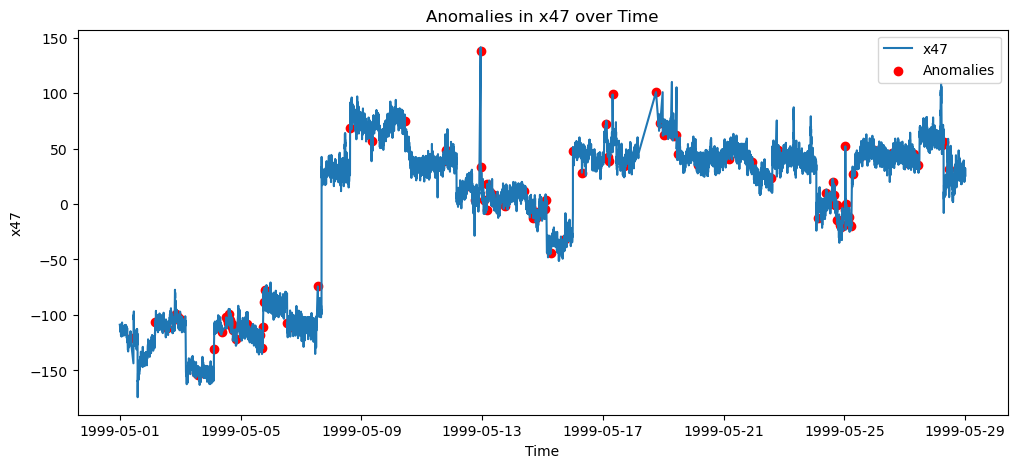

Analyzing Feature: x48


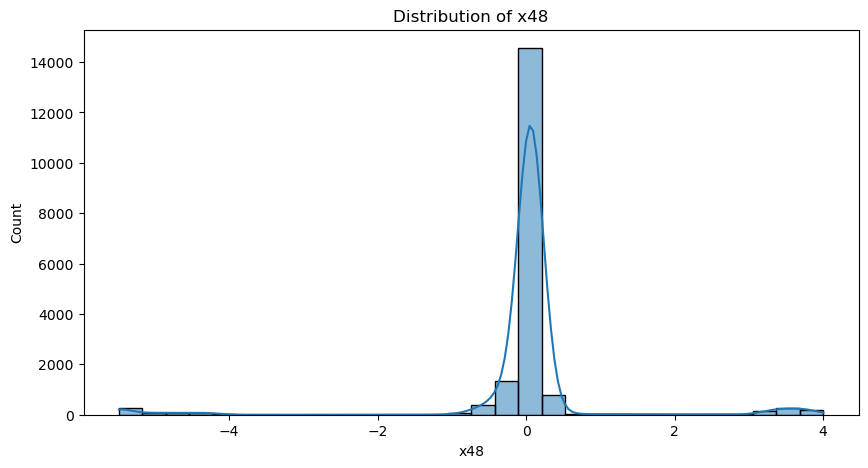

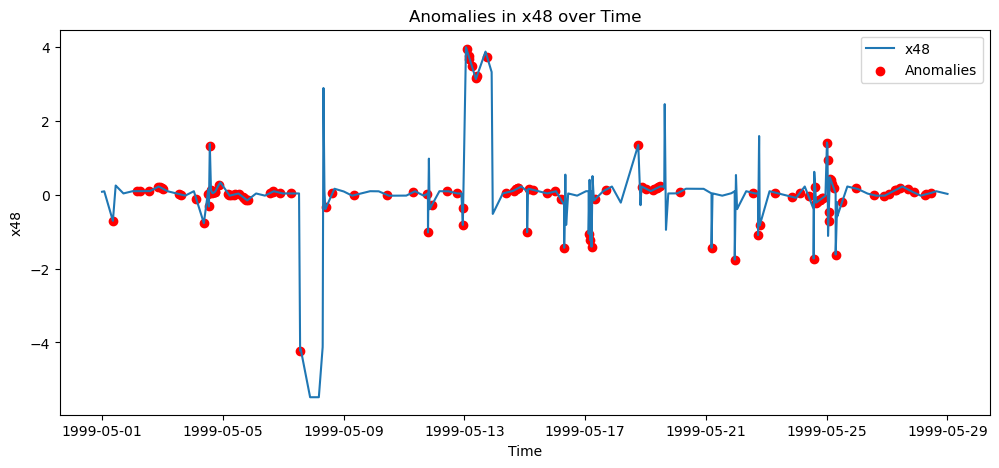

Analyzing Feature: x49


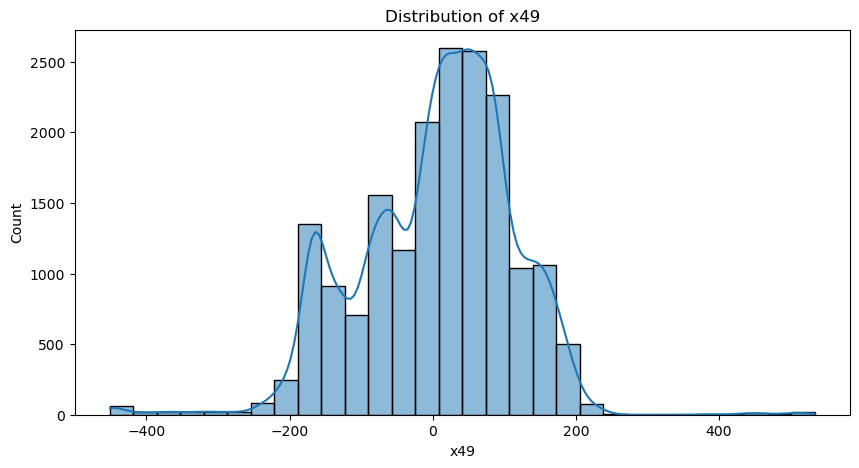

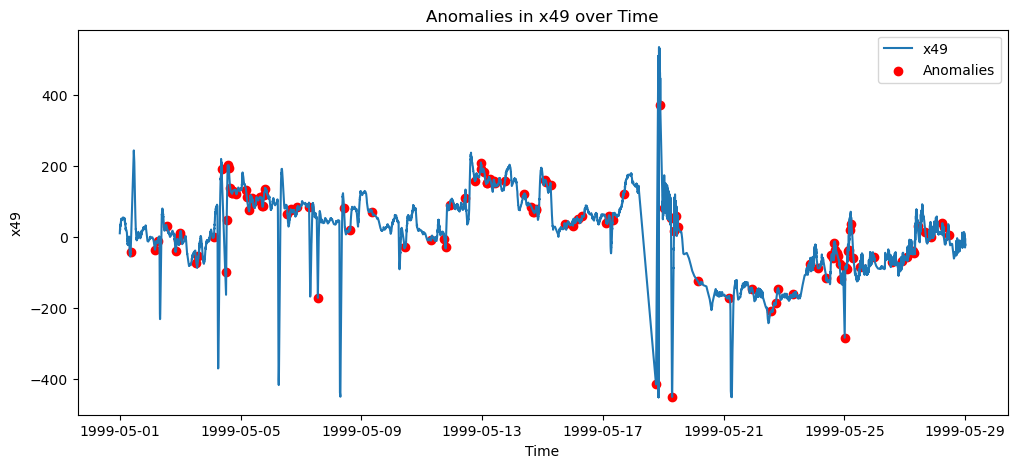

Analyzing Feature: x5


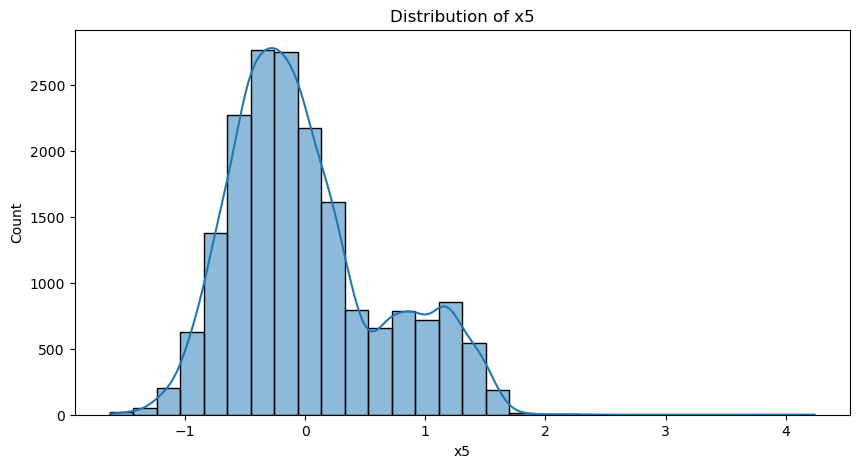

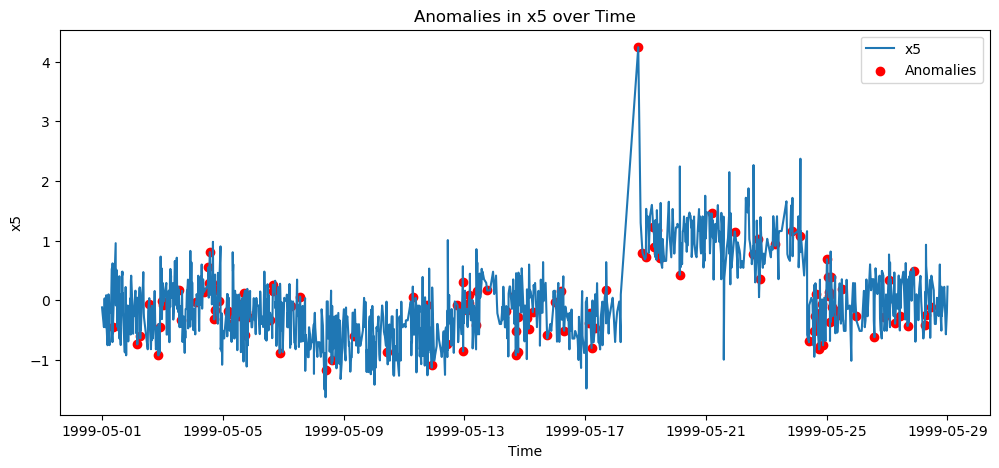

Analyzing Feature: x50


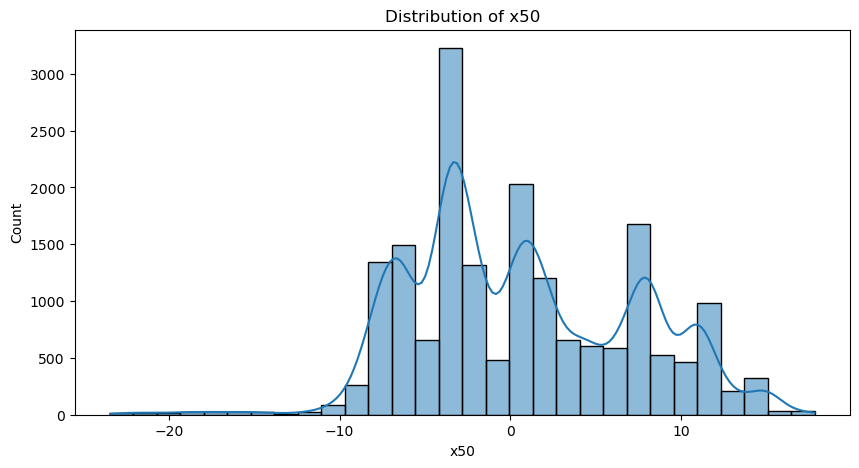

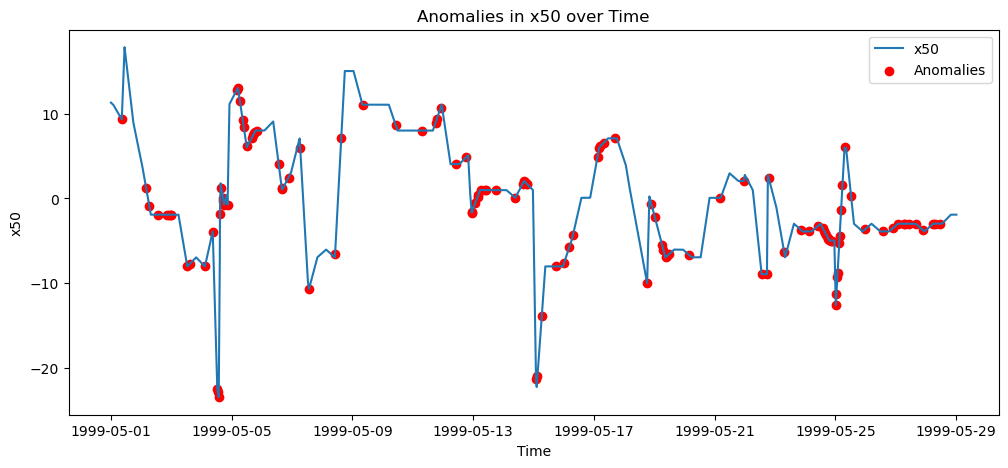

Analyzing Feature: x51


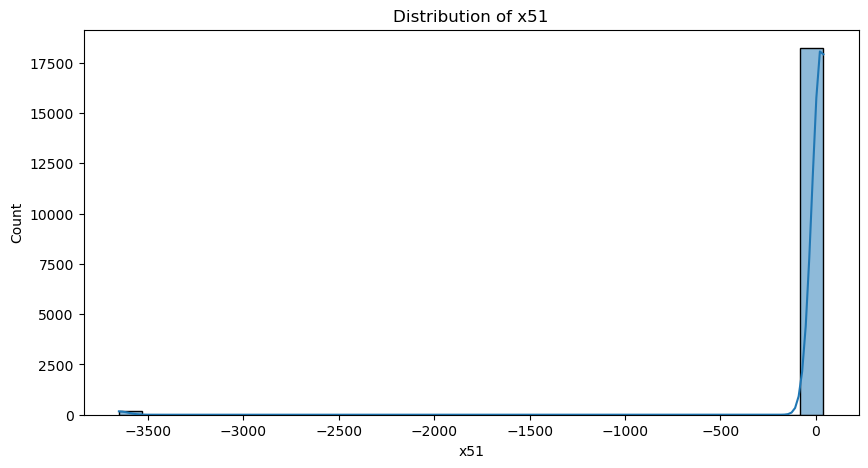

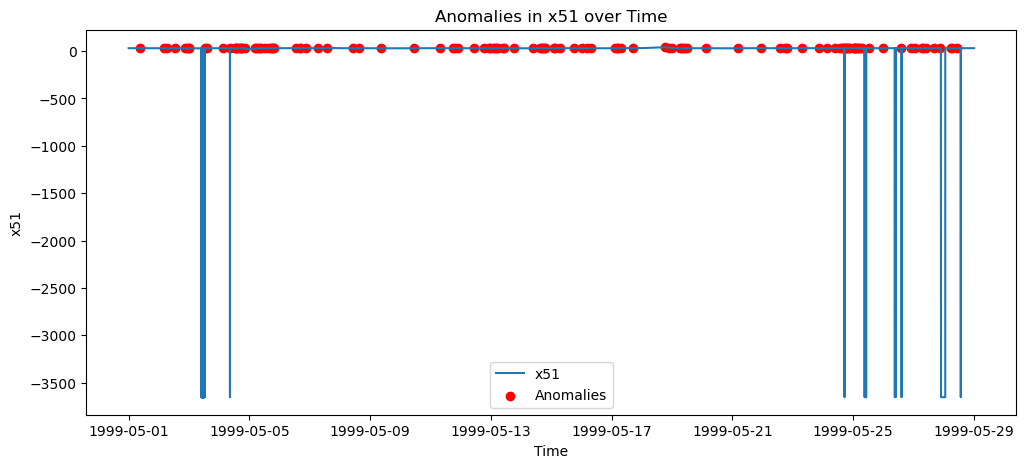

Analyzing Feature: x52


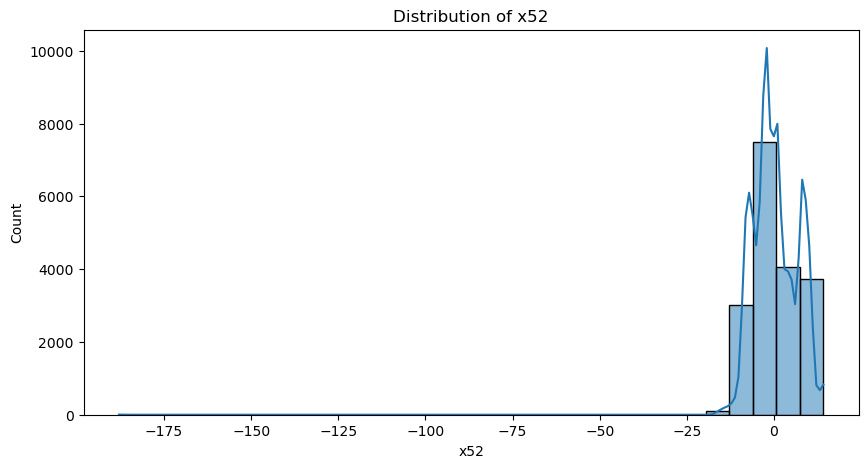

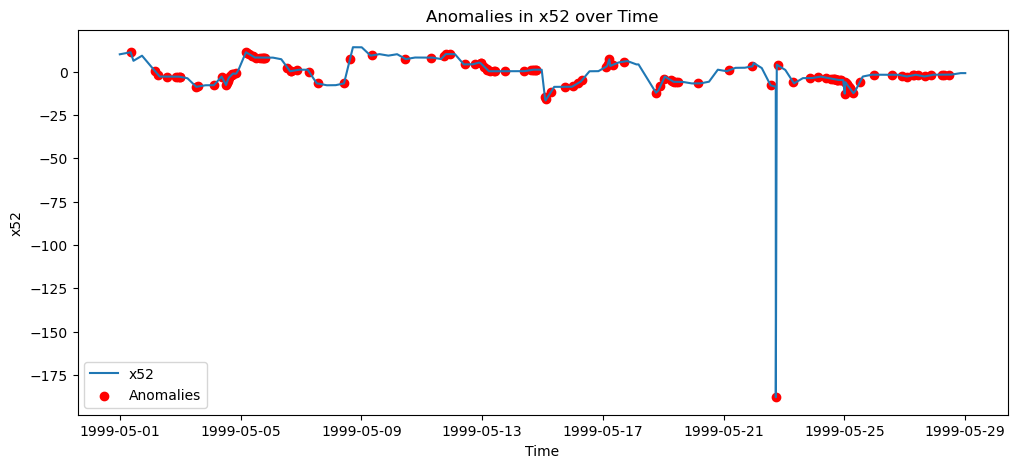

Analyzing Feature: x54


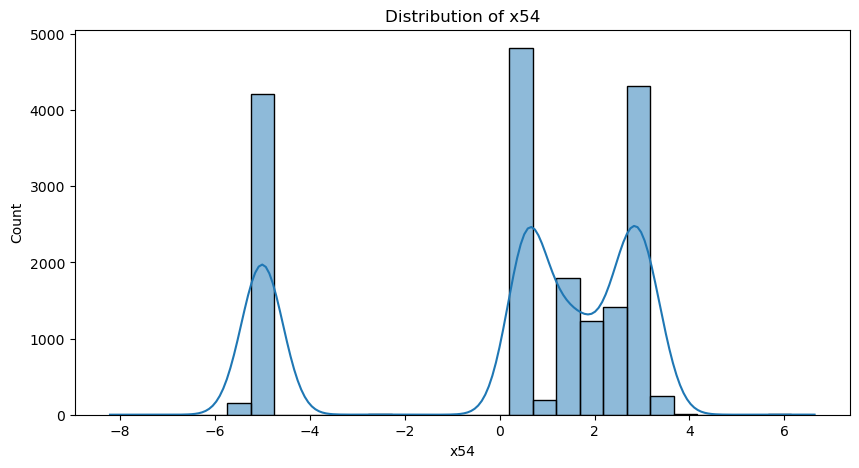

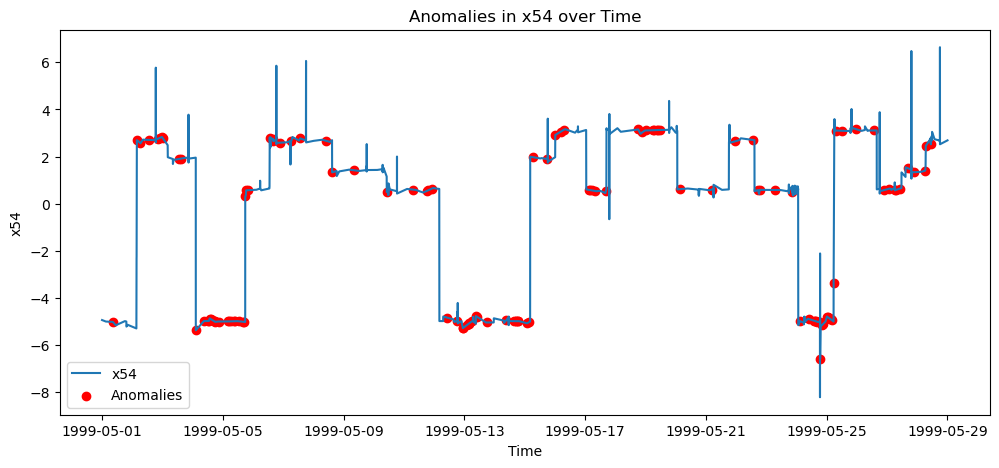

Analyzing Feature: x55


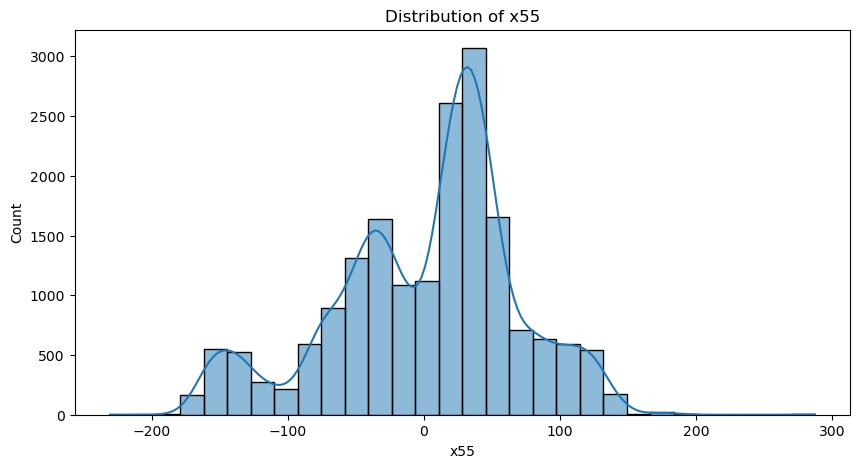

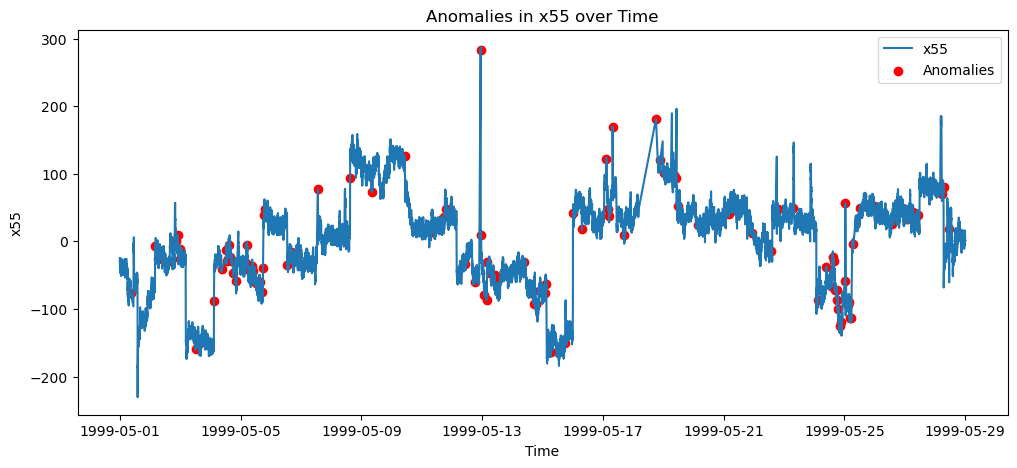

Analyzing Feature: x56


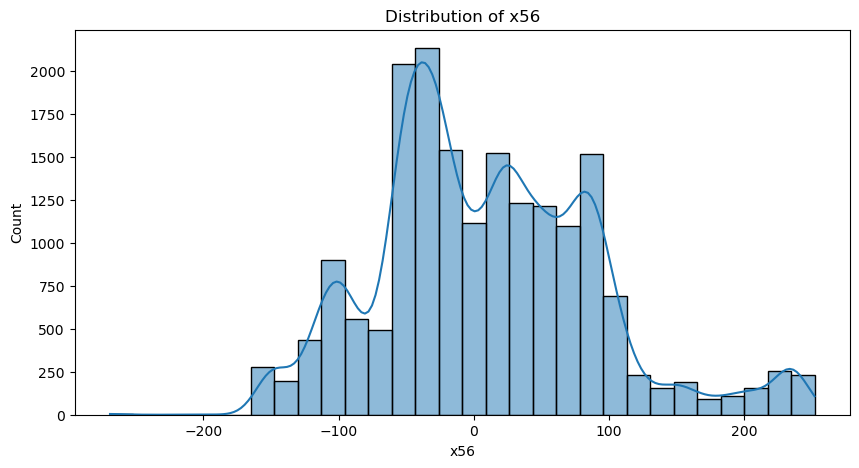

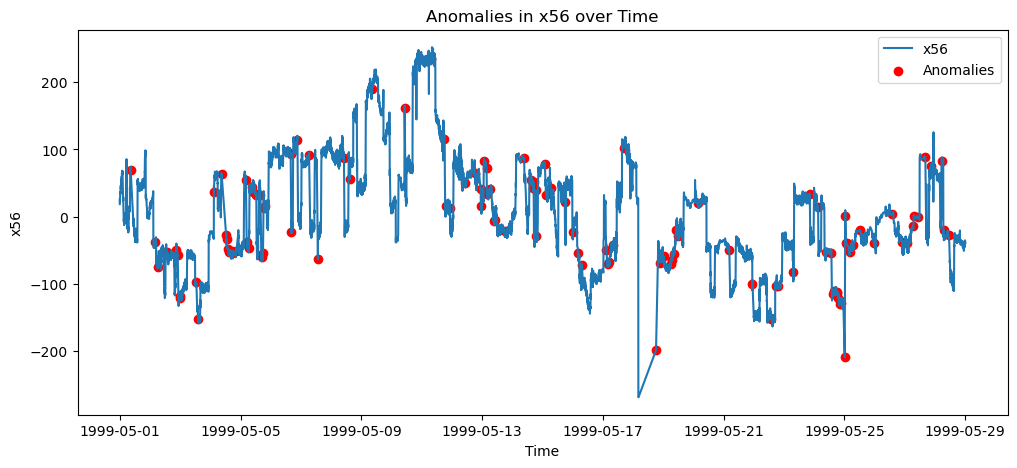

Analyzing Feature: x57


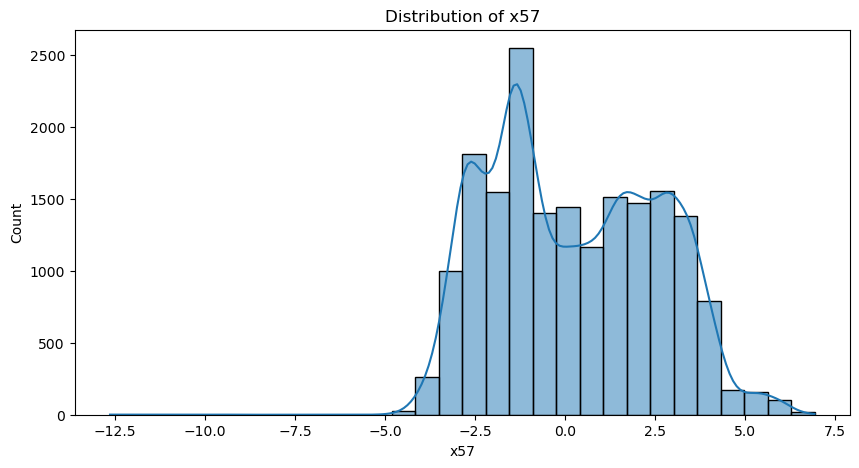

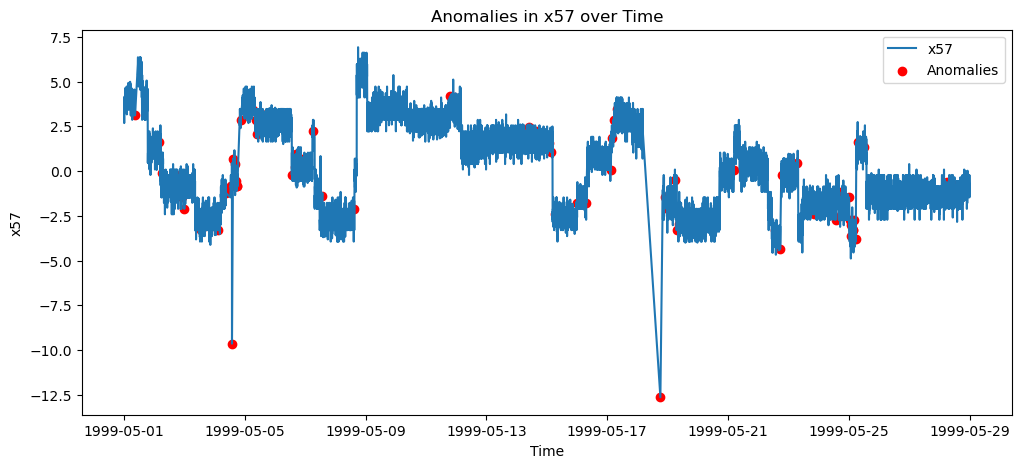

Analyzing Feature: x58


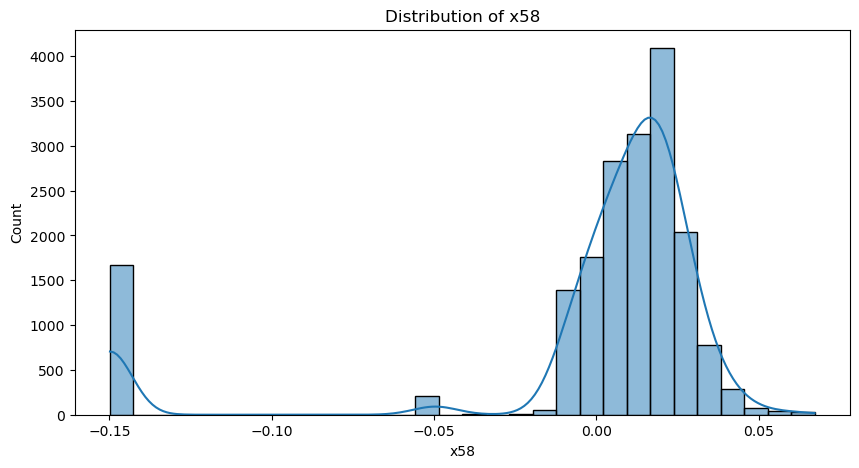

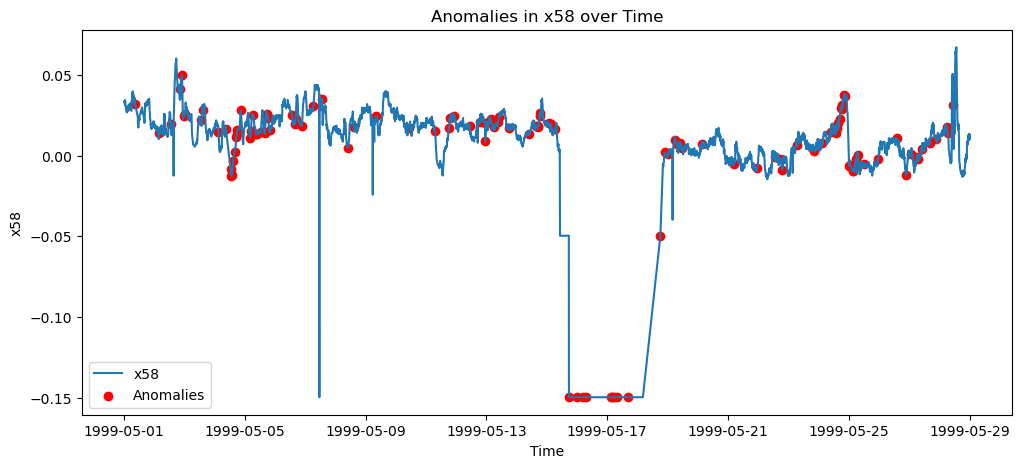

Analyzing Feature: x59


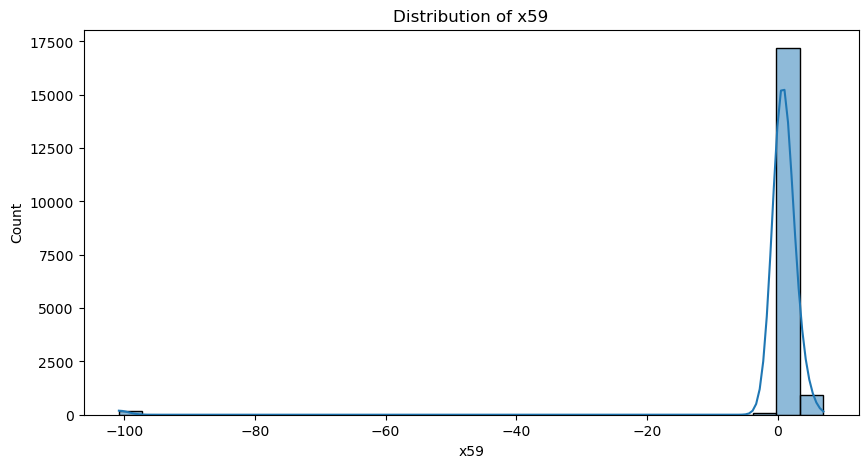

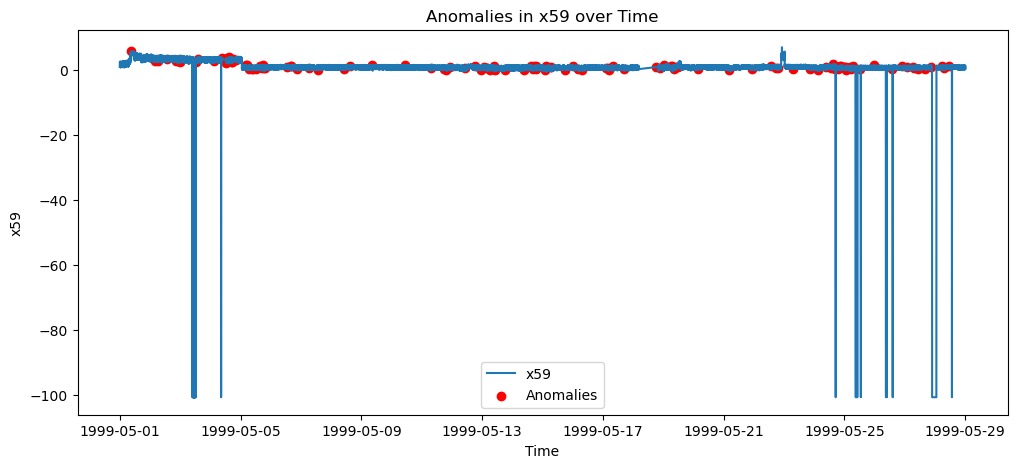

Analyzing Feature: x6


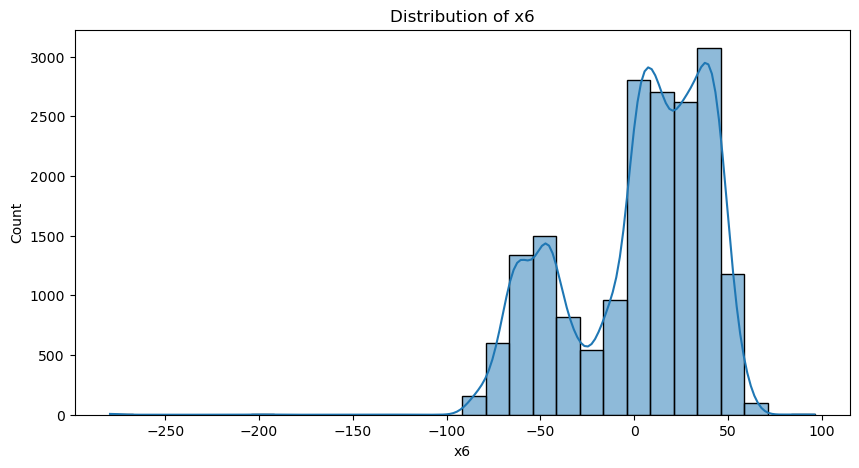

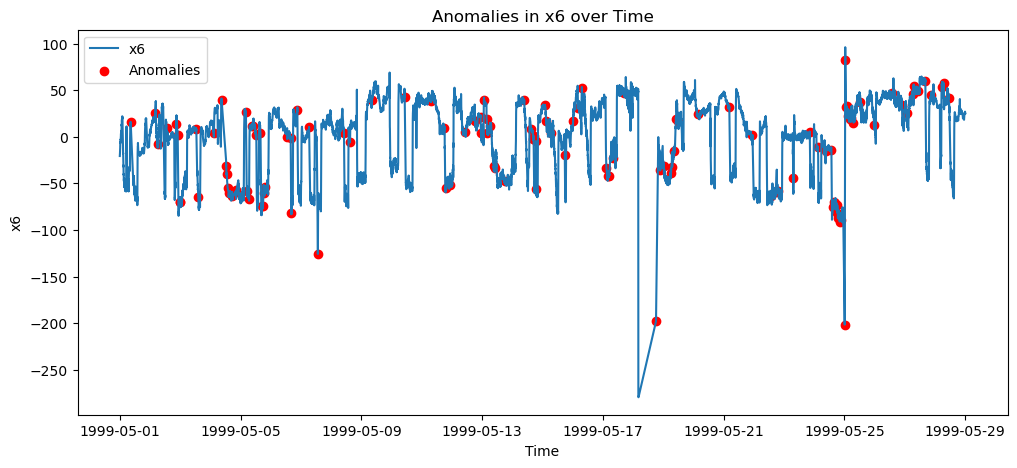

Analyzing Feature: x60


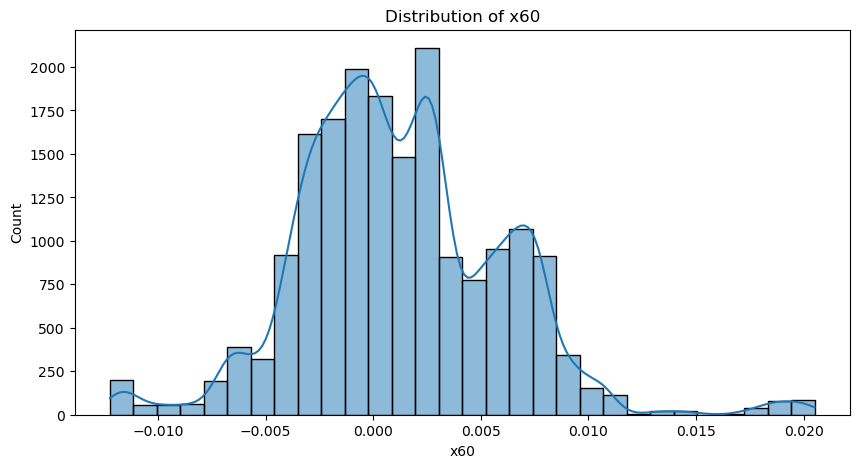

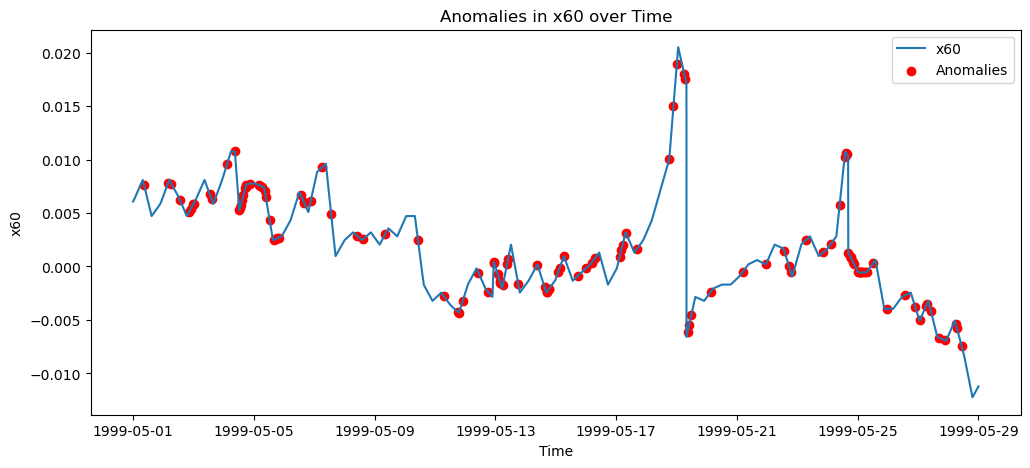

Analyzing Feature: x7


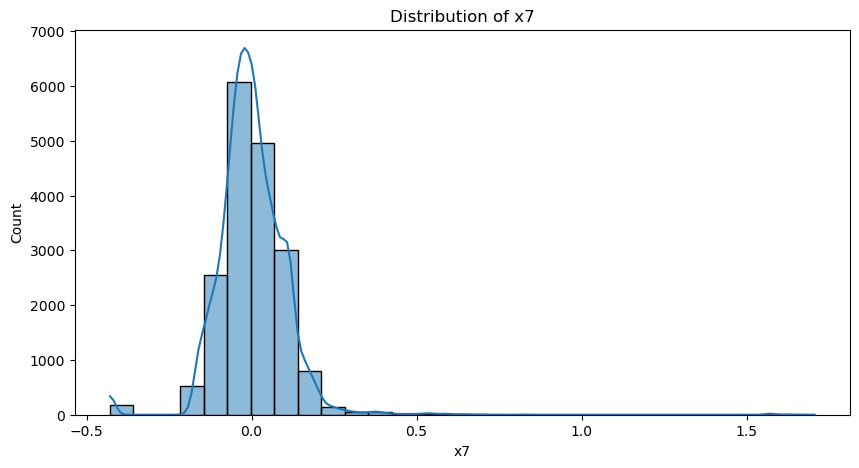

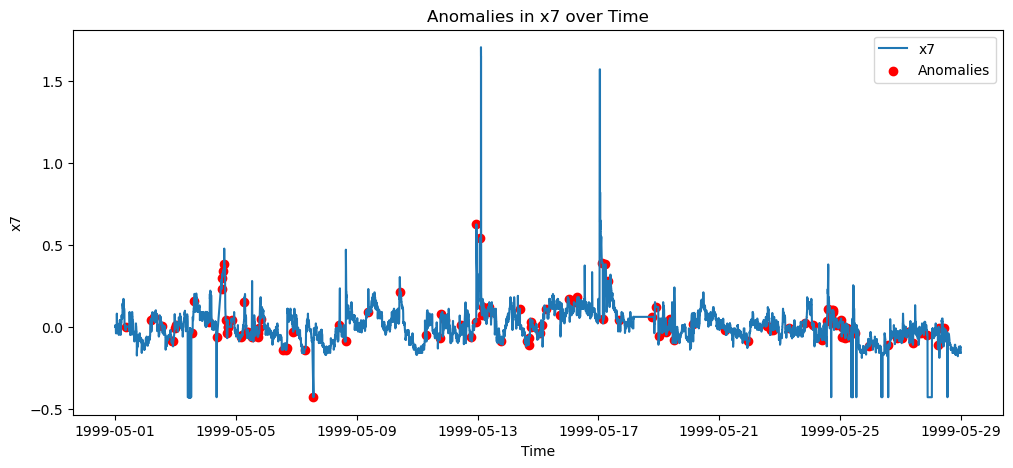

Analyzing Feature: x8


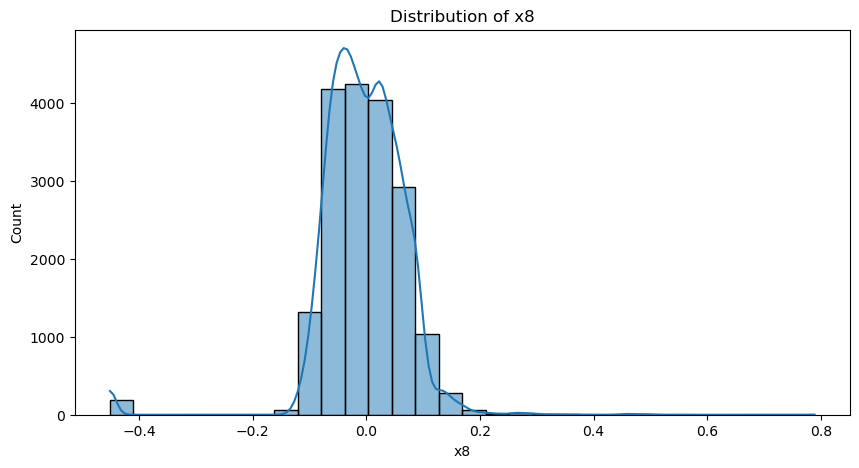

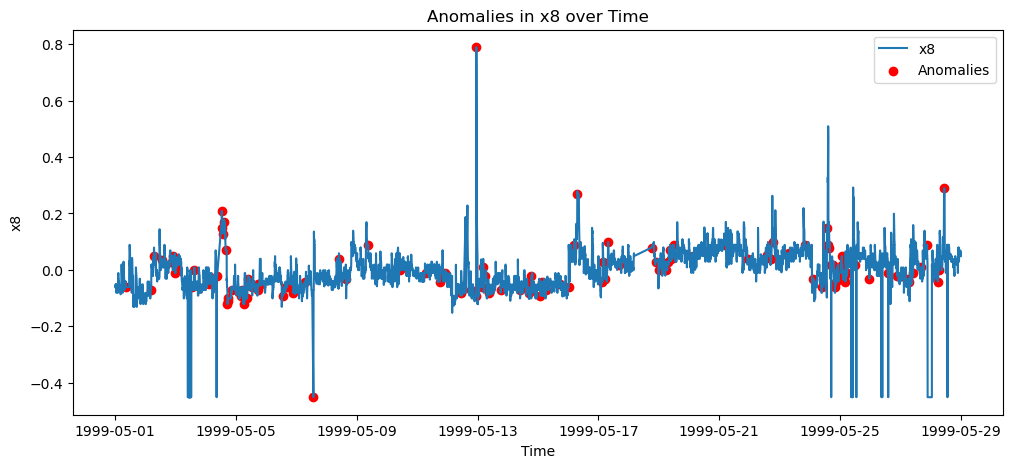

Analyzing Feature: x9


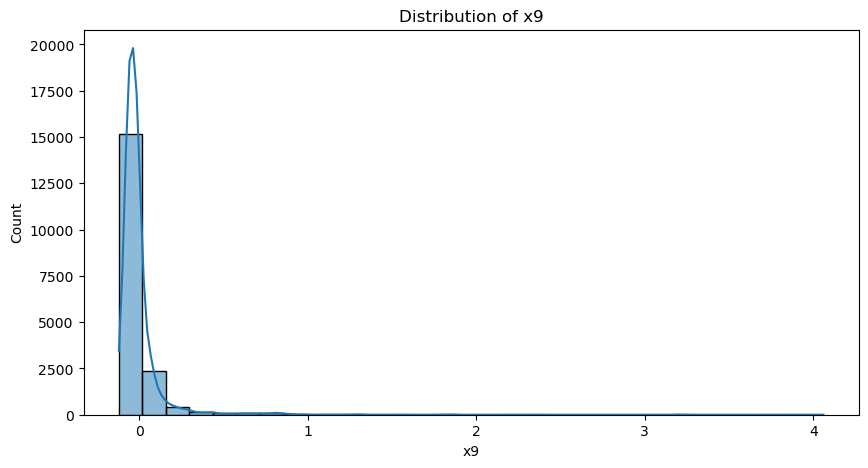

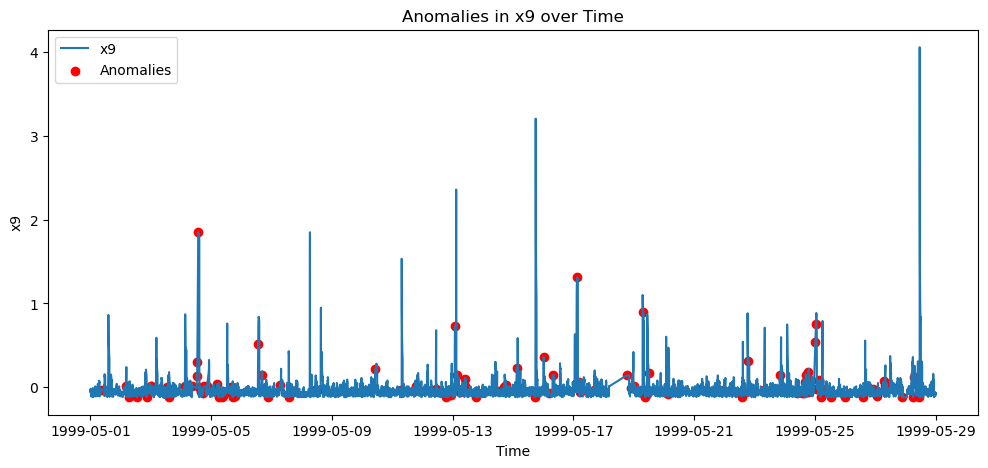

Analyzing Feature: y.1


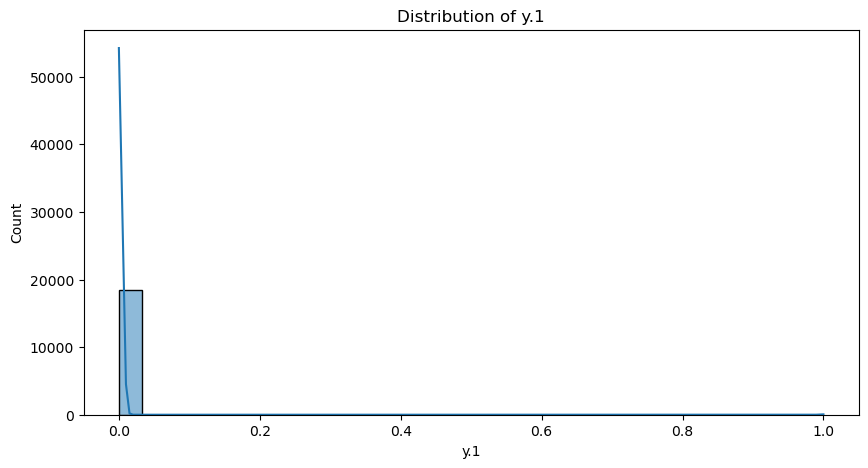

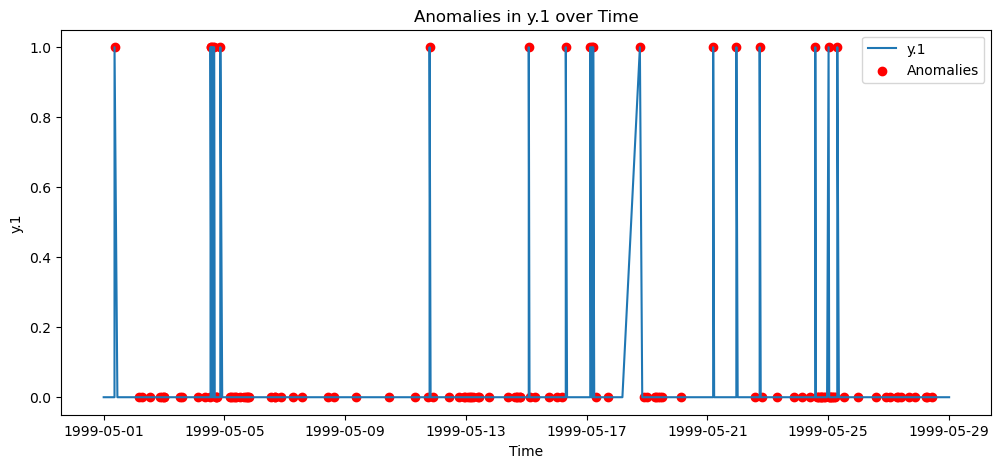

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
features = data.columns.difference(['time', 'y'])

# Loop through each feature
for feature in features:
    print(f"Analyzing Feature: {feature}")

    # Plot histogram to show the distribution of the feature
    plt.figure(figsize=(10, 5))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

    # Plot anomalies over time
    plt.figure(figsize=(12, 5))
    plt.plot(data['time'], data[feature], label=feature)
    plt.scatter(data[data['y'] == 1]['time'], data[data['y'] == 1][feature], color='red', label='Anomalies')
    plt.legend()
    plt.title(f'Anomalies in {feature} over Time')
    plt.xlabel('Time')
    plt.ylabel(feature)
    plt.show()

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy on Test Data: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3658
           1       0.93      0.64      0.76        22

    accuracy                           1.00      3680
   macro avg       0.97      0.82      0.88      3680
weighted avg       1.00      1.00      1.00      3680



In [44]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate tuned model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Accuracy after Tuning:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy after Tuning: 0.997554347826087


In [46]:
import joblib
joblib.dump(best_model, 'anomaly_detector_model.pkl')


['anomaly_detector_model.pkl']